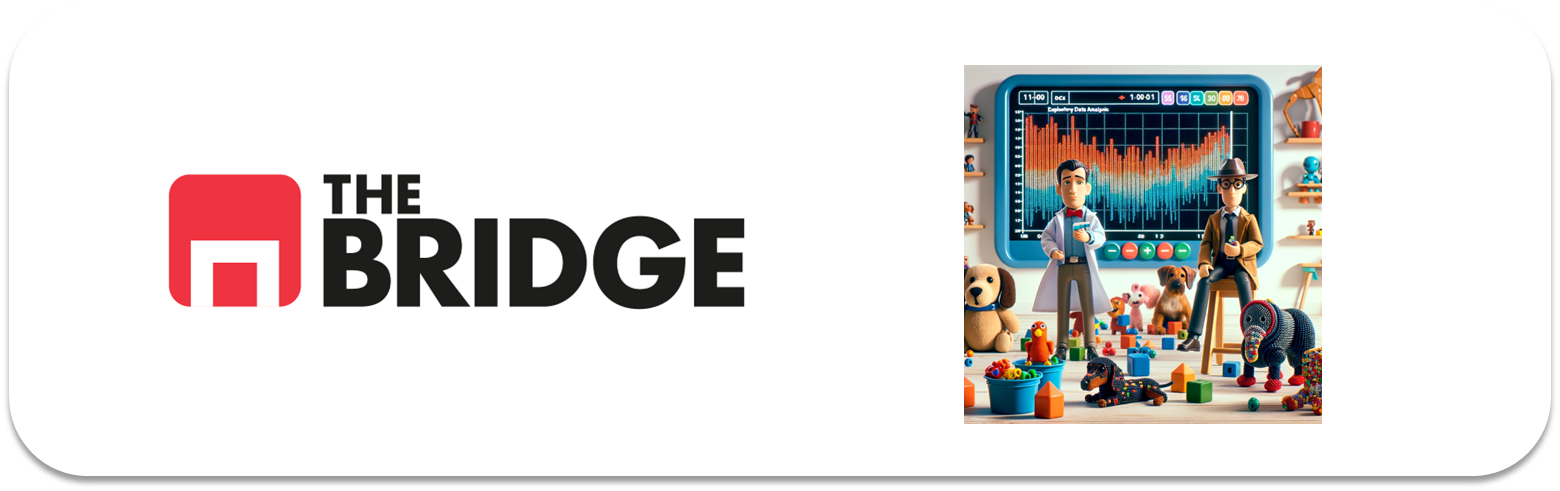

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [85]:
df_titanic = pd.read_csv("./data/titanic.csv")


In [86]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [87]:
eliminadas = ["deck", "survived", "pclass", "embarked"]
df_titanic.drop(eliminadas, axis=1, inplace=True)

In [88]:
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [89]:
df_titanic["family_menbers"] = df_titanic["parch"] + df_titanic["sibsp"]

In [90]:
df_titanic.sample(10)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_menbers
381,female,1.0,0,2,15.7417,Third,child,False,Cherbourg,yes,False,2
585,female,18.0,0,2,79.6500,First,woman,False,Southampton,yes,False,2
46,male,NaN,1,0,15.5000,Third,man,True,Queenstown,no,False,1
624,male,21.0,0,0,16.1000,Third,man,True,Southampton,no,True,0
81,male,29.0,0,0,9.5000,Third,man,True,Southampton,yes,True,0
371,male,18.0,1,0,6.4958,Third,man,True,Southampton,no,False,1
392,male,28.0,2,0,7.9250,Third,man,True,Southampton,no,False,2
352,male,15.0,1,1,7.2292,Third,child,False,Cherbourg,no,False,2
174,male,56.0,0,0,30.6958,First,man,True,Cherbourg,no,True,0
362,female,45.0,0,1,14.4542,Third,woman,False,Cherbourg,no,False,1


In [91]:
eliminadas_2 = ["parch", "sibsp"]
df_titanic.drop(eliminadas_2, axis=1, inplace=True)

In [92]:
df_titanic.sample(15)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_menbers
739,male,NaN,7.8958,Third,man,True,Southampton,no,True,0
603,male,44.0,8.0500,Third,man,True,Southampton,no,True,0
66,female,29.0,10.5000,Second,woman,False,Southampton,yes,True,0
278,male,7.0,29.1250,Third,child,False,Queenstown,no,False,5
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
368,female,NaN,7.7500,Third,woman,False,Queenstown,yes,True,0
652,male,21.0,8.4333,Third,man,True,Southampton,no,True,0
869,male,4.0,11.1333,Third,child,False,Southampton,yes,False,2
228,male,18.0,13.0000,Second,man,True,Southampton,no,True,0
372,male,19.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [93]:
moda_embarked = df_titanic["embark_town"].mode()[0]

In [94]:
moda_embarked

'Southampton'

In [95]:
df_titanic["embark_town"].fillna(moda_embarked, inplace=True)

In [96]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_menbers  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [97]:
df_titanic.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [98]:
media_male = df_titanic[df_titanic["who"] == "man"]["age"].mean()
media_woman = df_titanic[df_titanic["who"] == "woman"]["age"].mean()
media_child = df_titanic[df_titanic["who"] == "child"]["age"].mean()
print("Edad media hombres:", media_male)
print("Edad media mujeres:", media_woman)
print("Edad media niños/as:", media_child)

Edad media hombres: 33.17312348668281
Edad media mujeres: 32.0
Edad media niños/as: 6.369518072289156


In [99]:
df_titanic.loc[(df_titanic["who"] == "man") & (df_titanic["age"].isna()), "age"] = media_male
df_titanic.loc[(df_titanic["who"] == "woman") & (df_titanic["age"].isna()), "age"] = media_woman
df_titanic.loc[(df_titanic["who"] == "child") & (df_titanic["age"].isna()), "age"] = media_child

In [100]:
df_titanic.sample(5)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_menbers
91,male,20.000000,7.8542,Third,man,True,Southampton,no,True,0
602,male,33.173123,42.4000,First,man,True,Southampton,no,True,0
404,female,20.000000,8.6625,Third,woman,False,Southampton,no,True,0
862,female,48.000000,25.9292,First,woman,False,Southampton,yes,True,0
692,male,33.173123,56.4958,Third,man,True,Southampton,yes,True,0


In [101]:
df_titanic["age"] = df_titanic["age"].round(2)

In [102]:
df_titanic.sample(15)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_menbers
520,female,30.00,93.5000,First,woman,False,Southampton,yes,True,0
56,female,21.00,10.5000,Second,woman,False,Southampton,yes,True,0
761,male,41.00,7.1250,Third,man,True,Southampton,no,True,0
22,female,15.00,8.0292,Third,child,False,Queenstown,yes,True,0
221,male,27.00,13.0000,Second,man,True,Southampton,no,True,0
622,male,20.00,15.7417,Third,man,True,Cherbourg,yes,False,2
26,male,33.17,7.2250,Third,man,True,Cherbourg,no,True,0
278,male,7.00,29.1250,Third,child,False,Queenstown,no,False,5
861,male,21.00,11.5000,Second,man,True,Southampton,no,False,1
592,male,47.00,7.2500,Third,man,True,Southampton,no,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

In [104]:
df_titanic.sample(3)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_menbers
769,male,32.0,8.3625,Third,man,True,Southampton,no,True,0
883,male,28.0,10.5000,Second,man,True,Southampton,no,True,0
678,female,43.0,46.9000,Third,woman,False,Southampton,no,False,7


1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

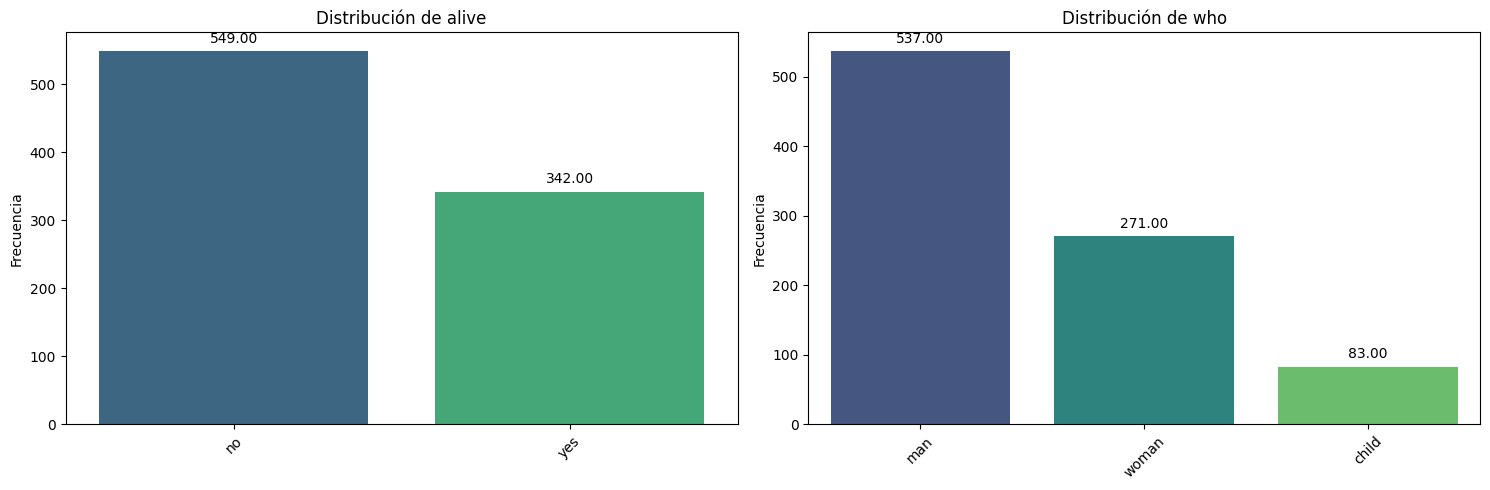

In [105]:
# 1 En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente 
# significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

pinta_distribucion_categoricas(df_titanic,["alive", "who"], mostrar_valores=True)


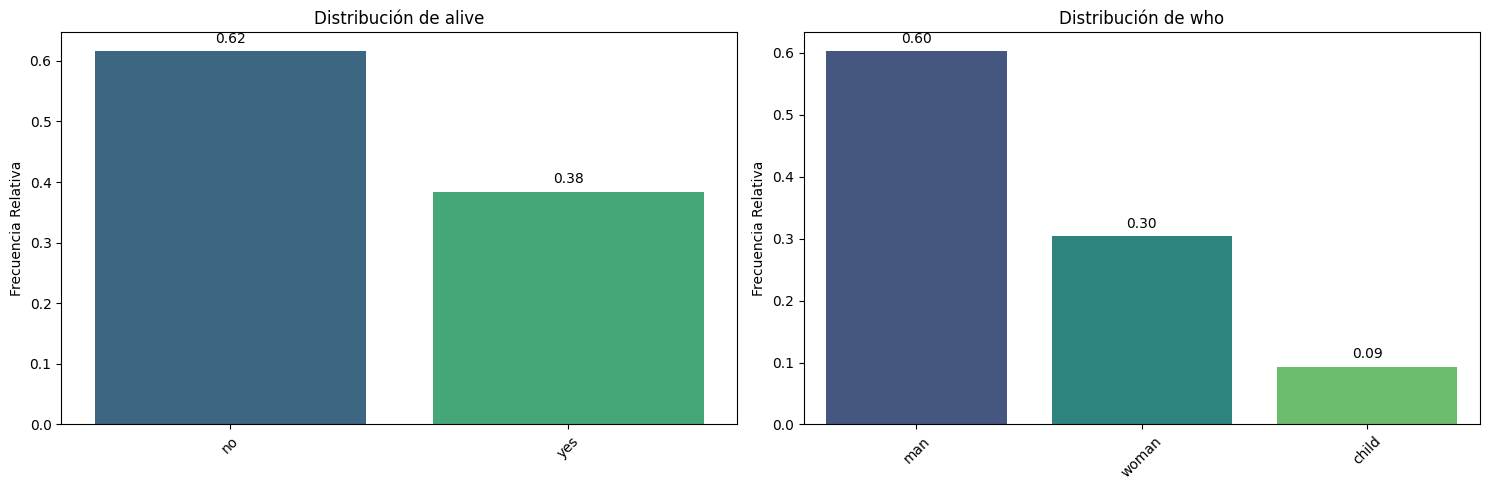

In [106]:
pinta_distribucion_categoricas(df_titanic,["alive", "who"], relativa=True, mostrar_valores=True)

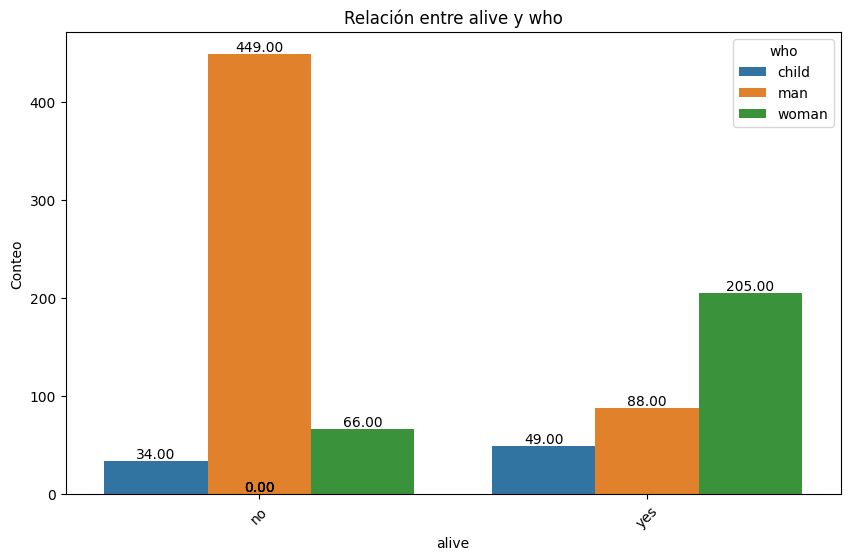

In [107]:
plot_categorical_relationship_fin(df_titanic, "alive", "who", show_values=True)

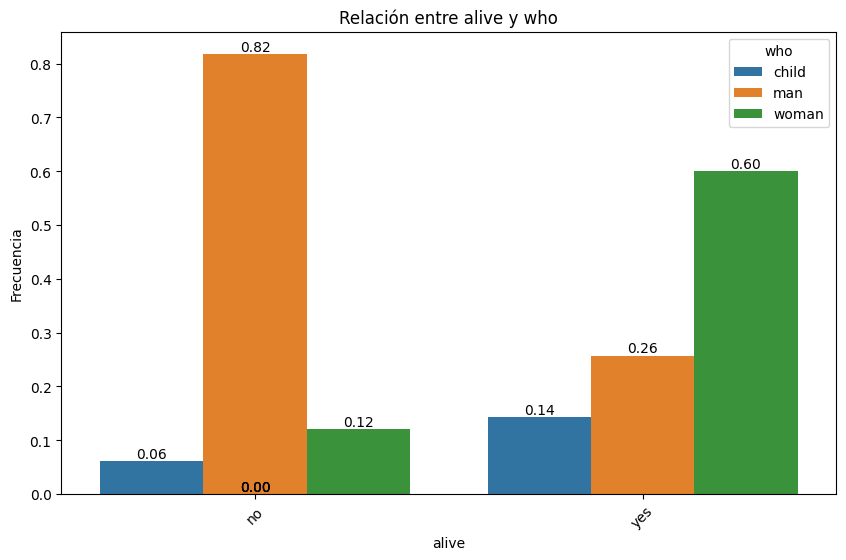

In [108]:
plot_categorical_relationship_fin(df_titanic, "alive", "who", relative_freq=True, show_values=True)

In [114]:
df_titanic.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [ ]:
# 2 En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente
# significativa entre la clase en la que se viajaba y la supervivencia?

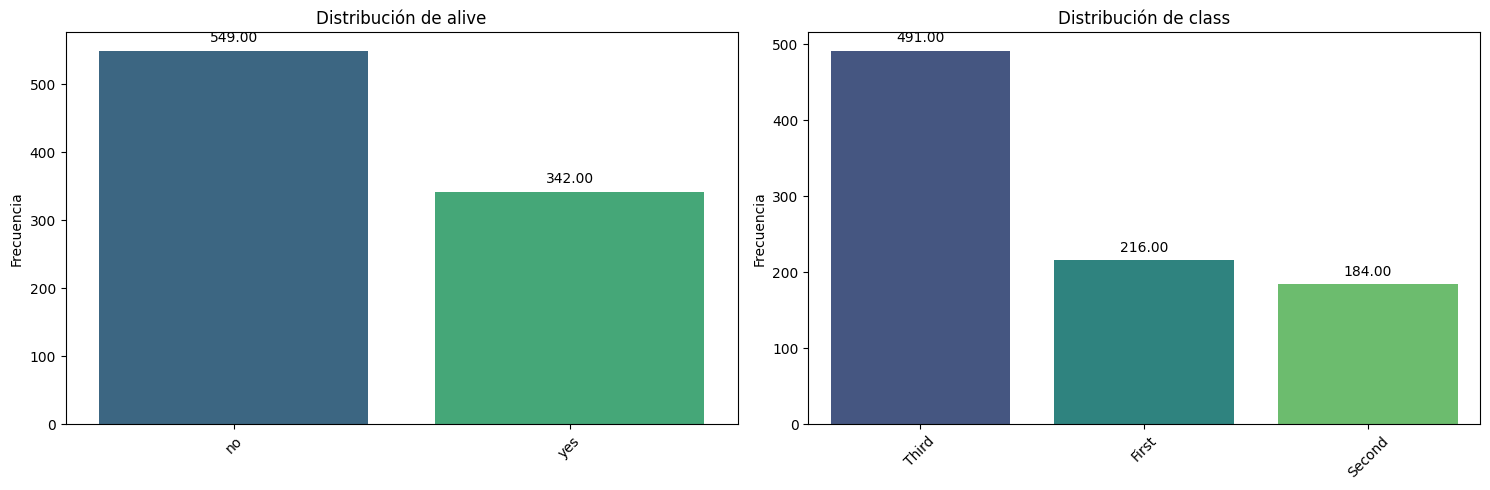

In [115]:
pinta_distribucion_categoricas(df_titanic,["alive", "class"], mostrar_valores=True)


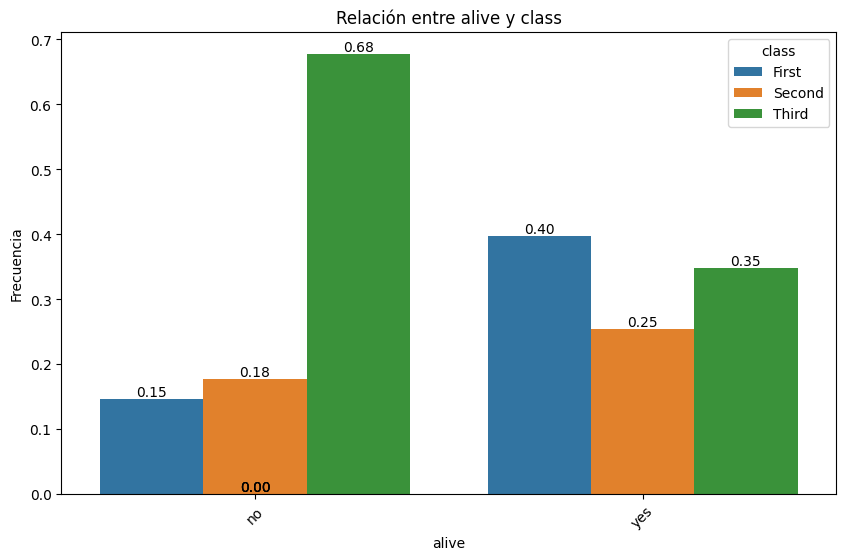

In [117]:
plot_categorical_relationship_fin(df_titanic, "alive","class", relative_freq = True, show_values = True)

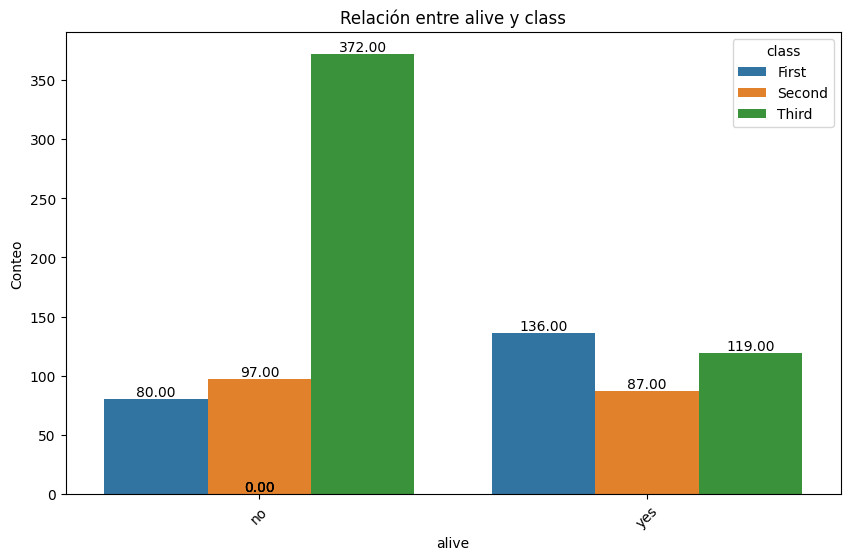

In [119]:
plot_categorical_relationship_fin(df_titanic, "alive","class", show_values = True)

In [123]:
df_titanic["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [ ]:
# 3 ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística 
# significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

In [131]:
survived = df_titanic[df_titanic["alive"] == "yes"].groupby("embark_town")["alive"].count()
survived

embark_town
Cherbourg       93
Queenstown      30
Southampton    219
Name: alive, dtype: int64

In [129]:
porcentaje = (survived / df_titanic["embark_town"].value_counts()) * 100
porcentaje

embark_town
Cherbourg      55.357143
Queenstown     38.961039
Southampton    33.900929
dtype: float64

In [133]:
prueba = df_titanic[df_titanic["class"] == "First"].groupby("embark_town")["class"].count()
prueba

embark_town
Cherbourg       85
Queenstown       2
Southampton    129
Name: class, dtype: int64

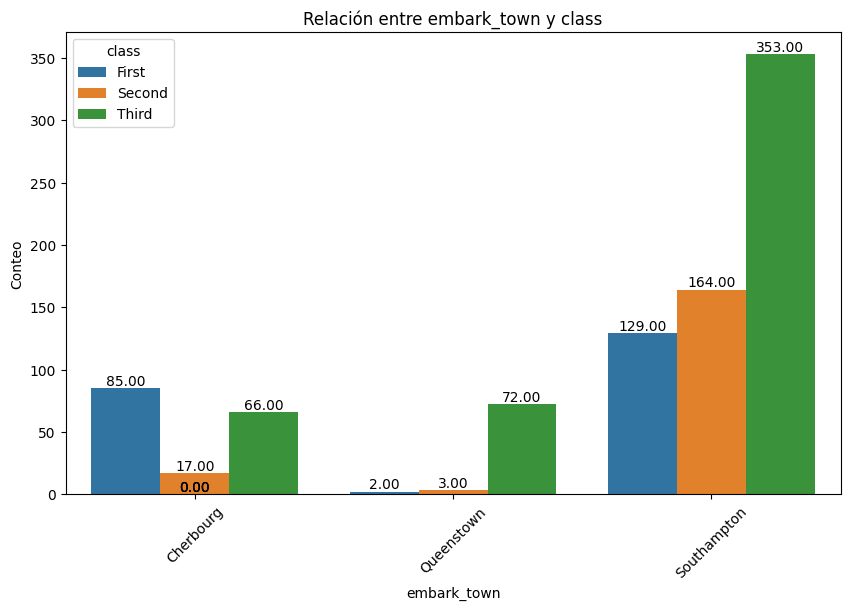

In [134]:
plot_categorical_relationship_fin(df_titanic, "embark_town","class", show_values = True)

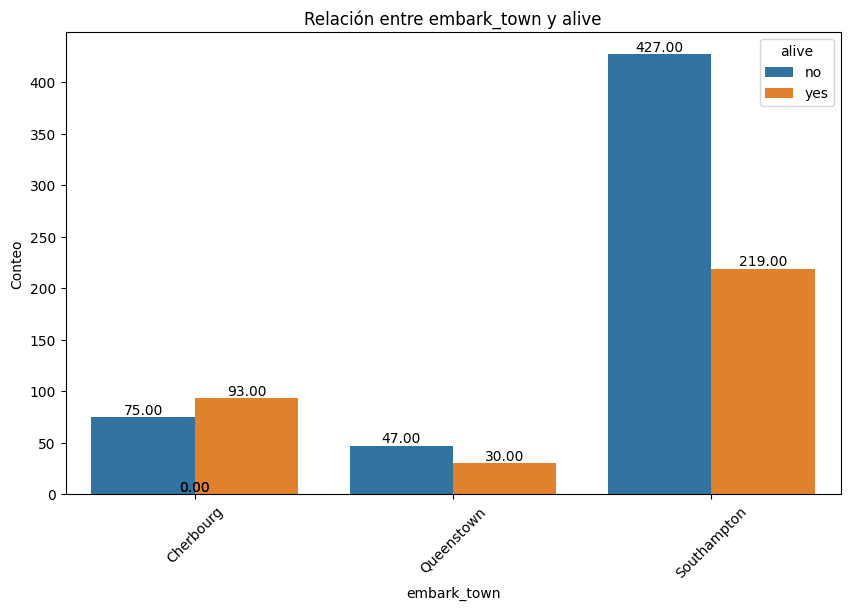

In [136]:
plot_categorical_relationship_fin(df_titanic, "embark_town", "alive", show_values = True)

In [137]:
tabla_contingencia = pd.crosstab(df_titanic['embark_town'], df_titanic['alive'])

tabla_contingencia


alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [138]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


In [ ]:
# 4 ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

In [143]:
df_titanic.groupby("alive")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
alive,,,,,,,,
no,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
yes,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


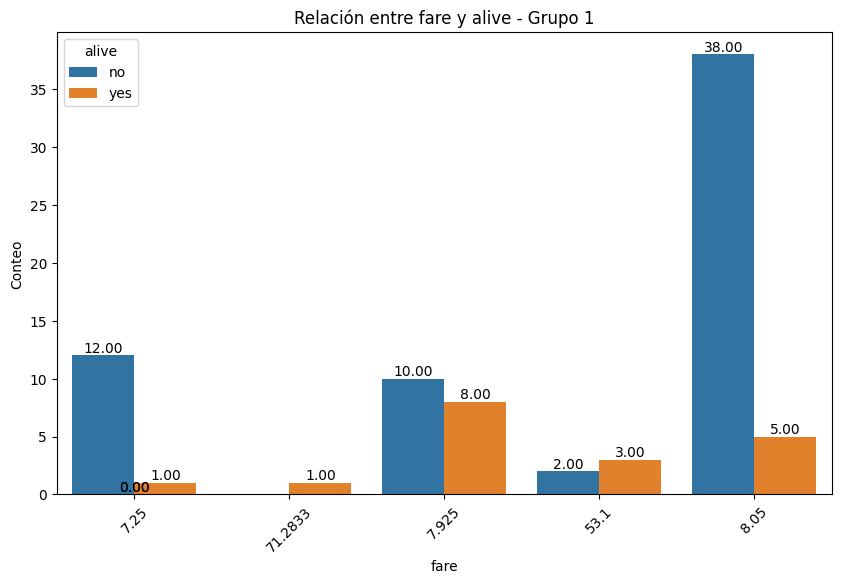

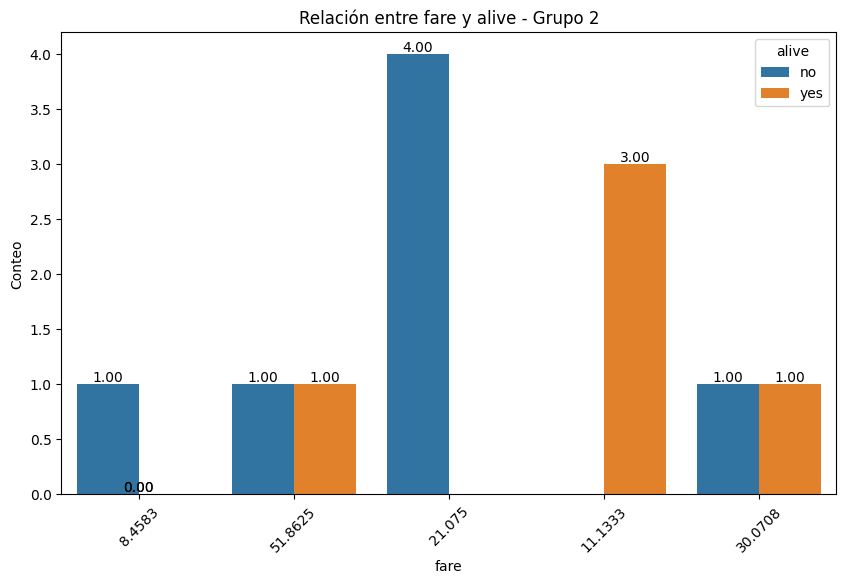

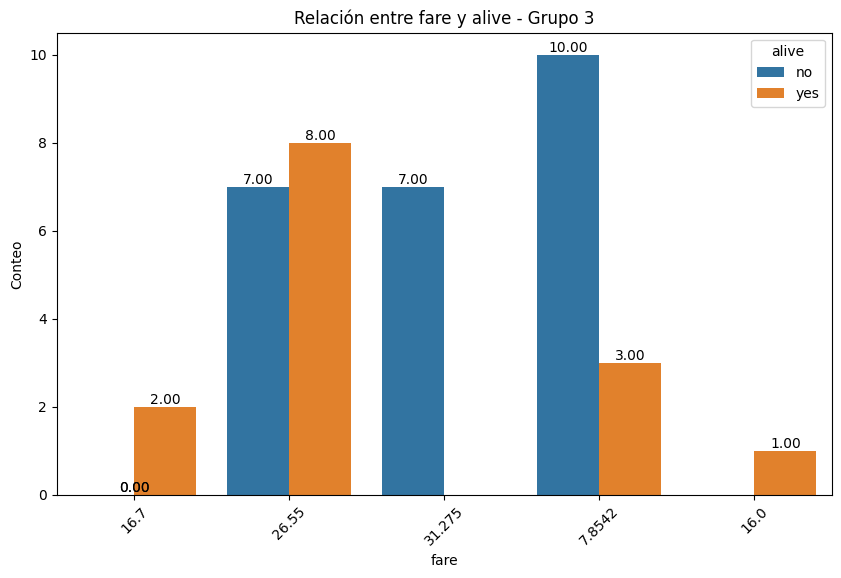

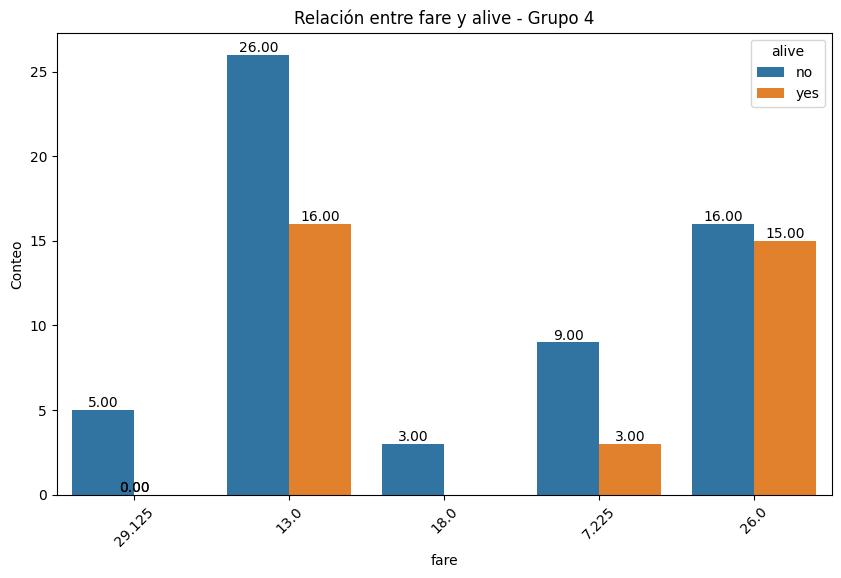

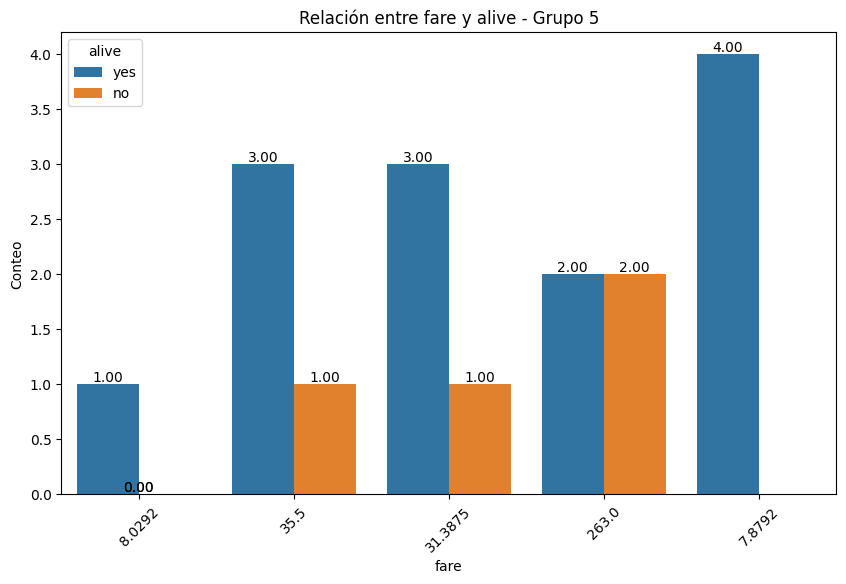

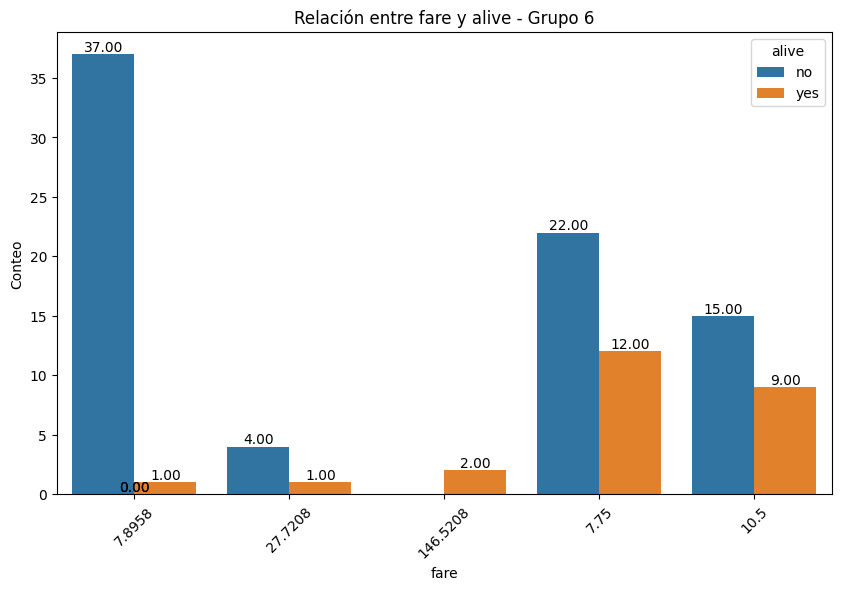

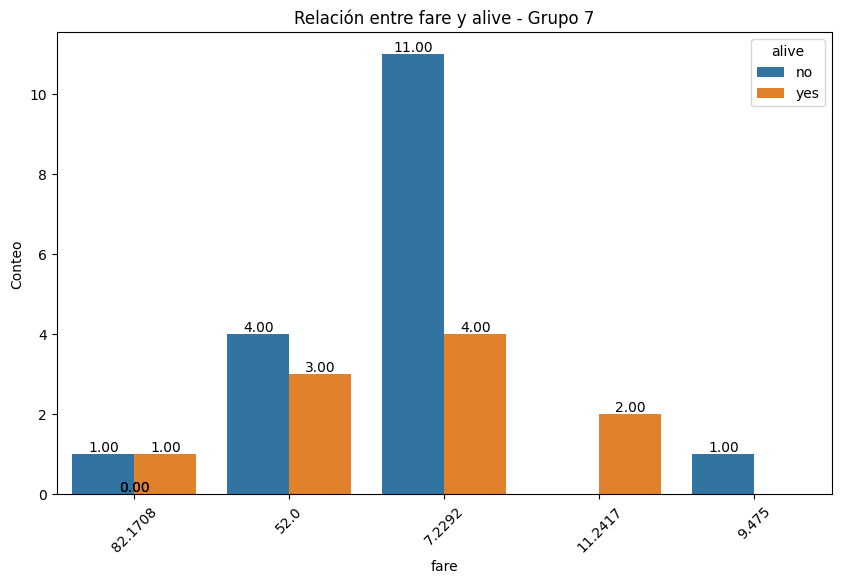

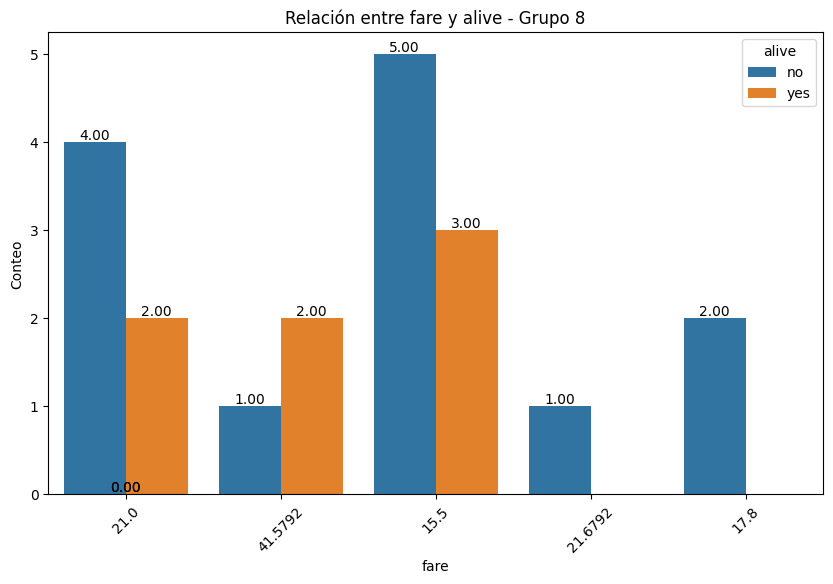

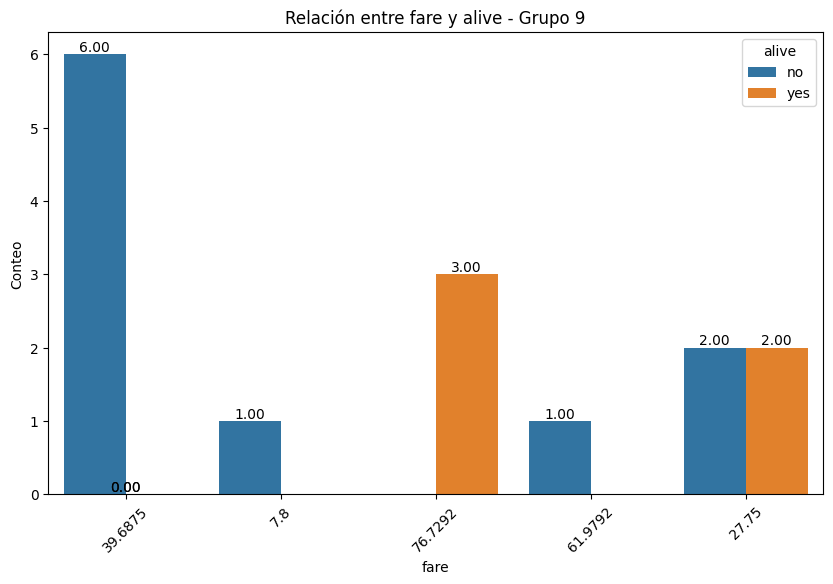

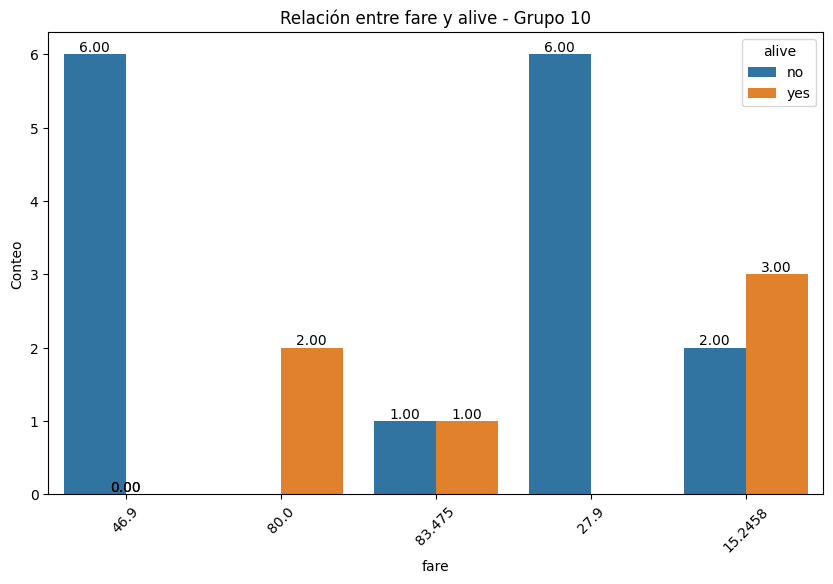

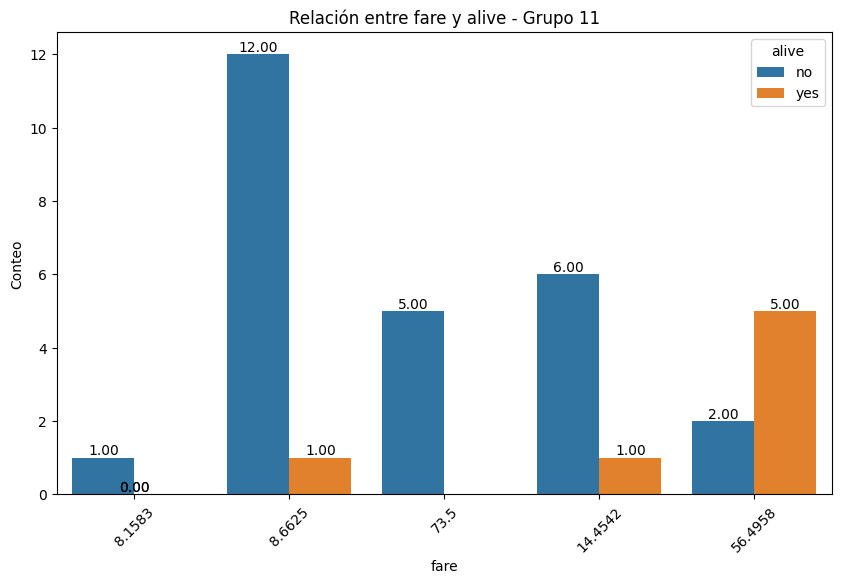

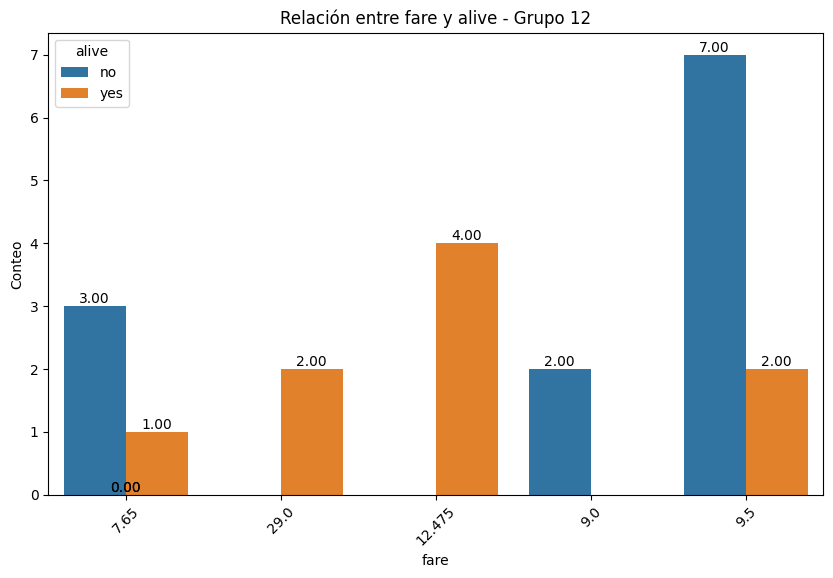

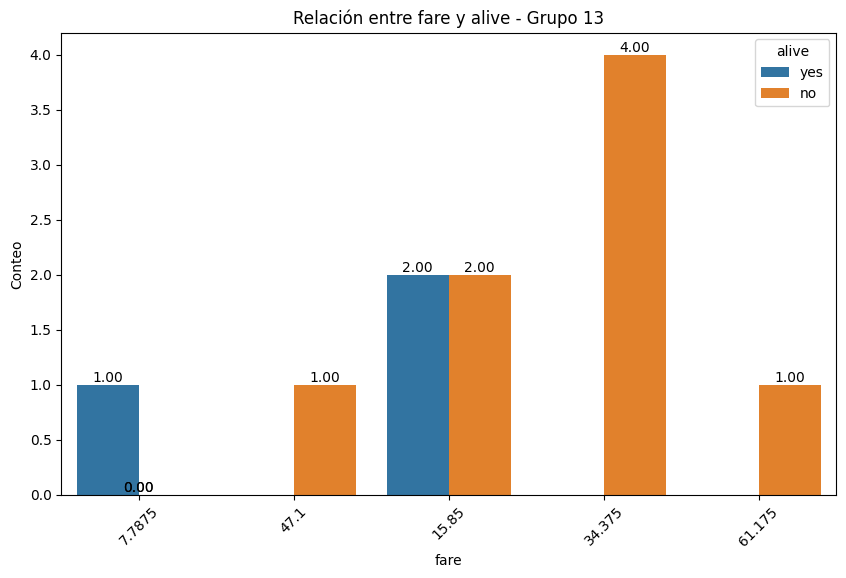

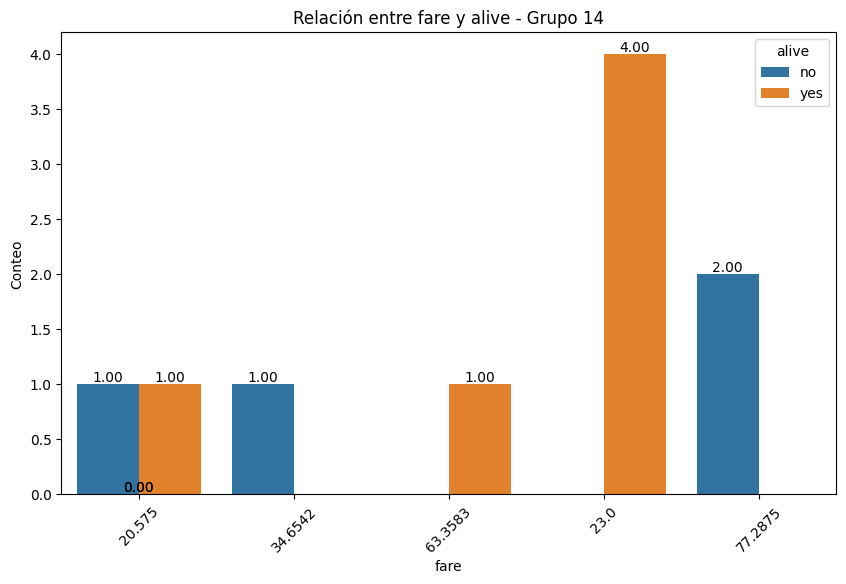

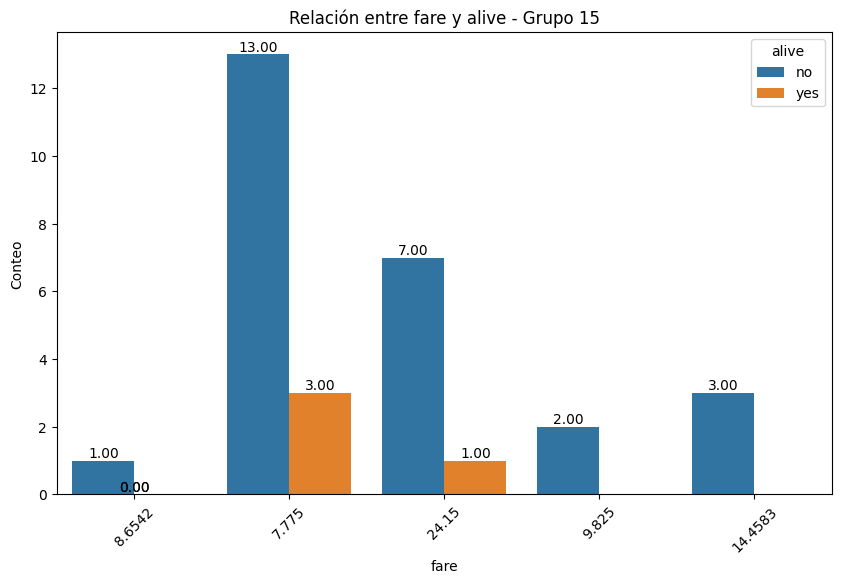

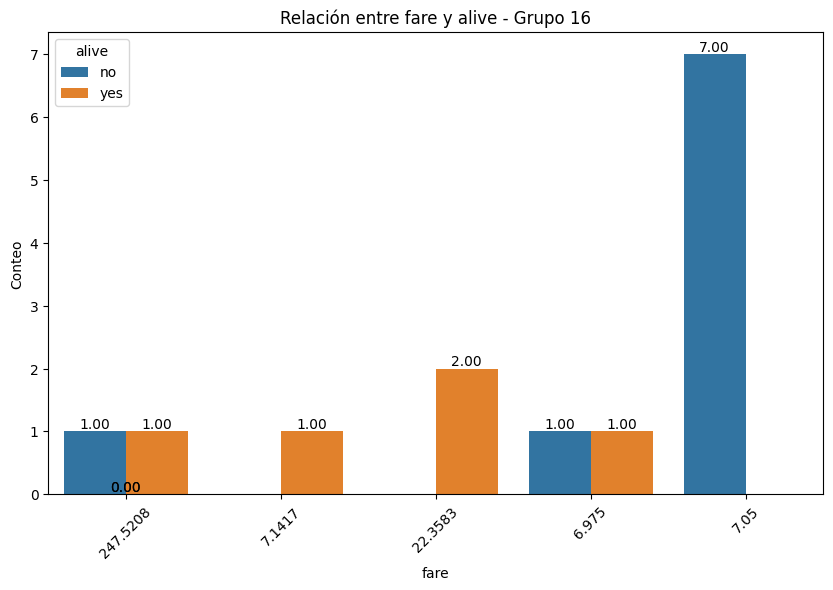

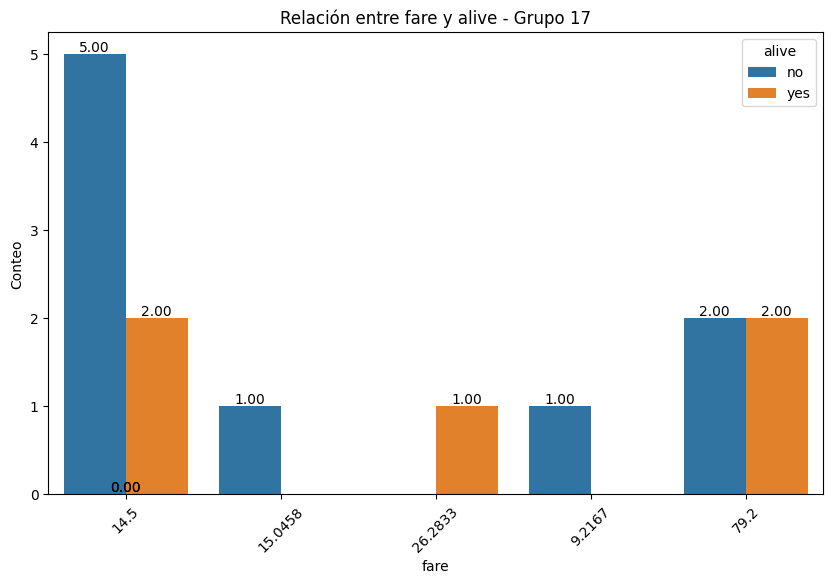

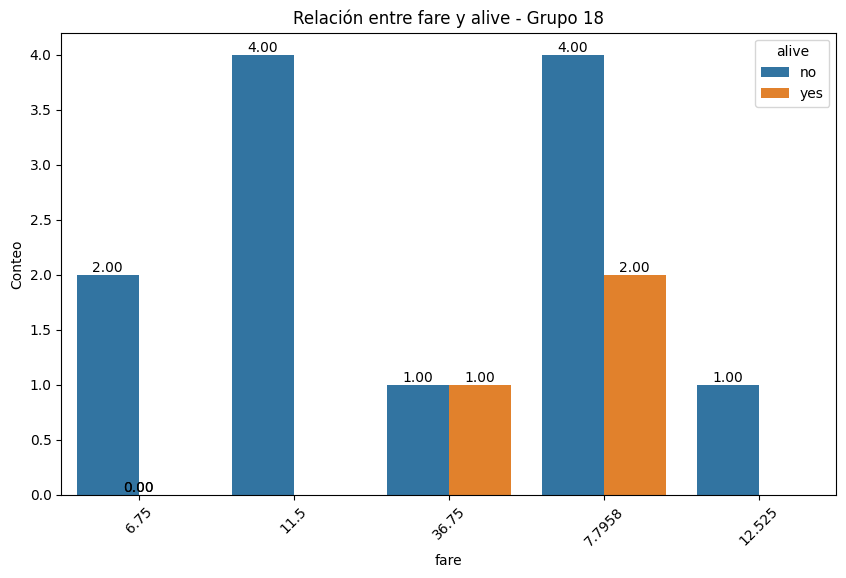

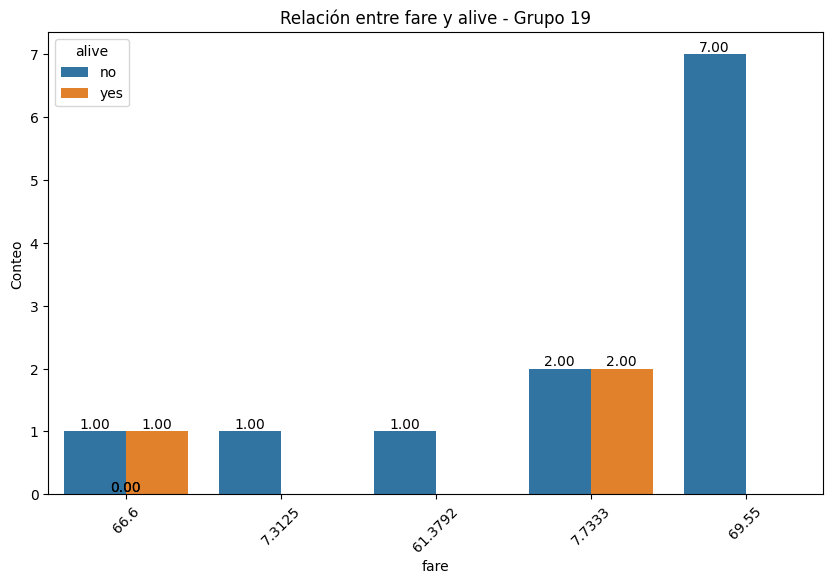

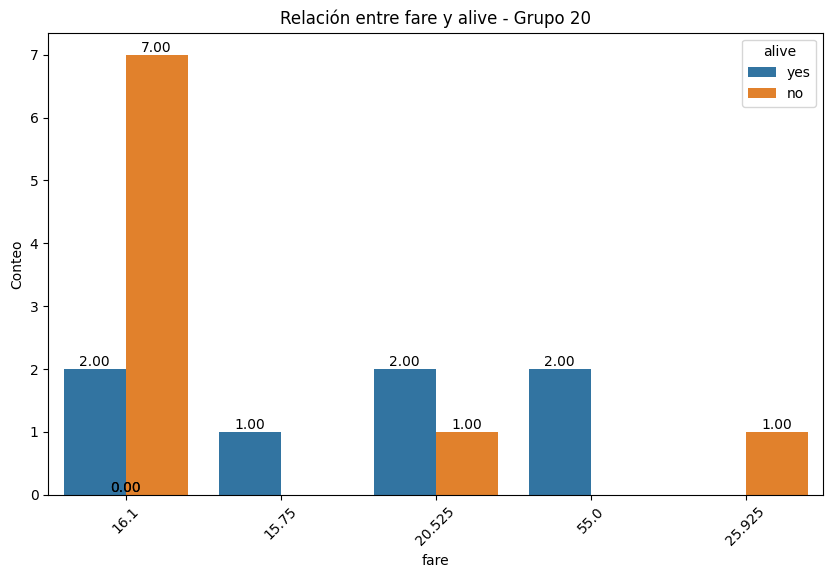

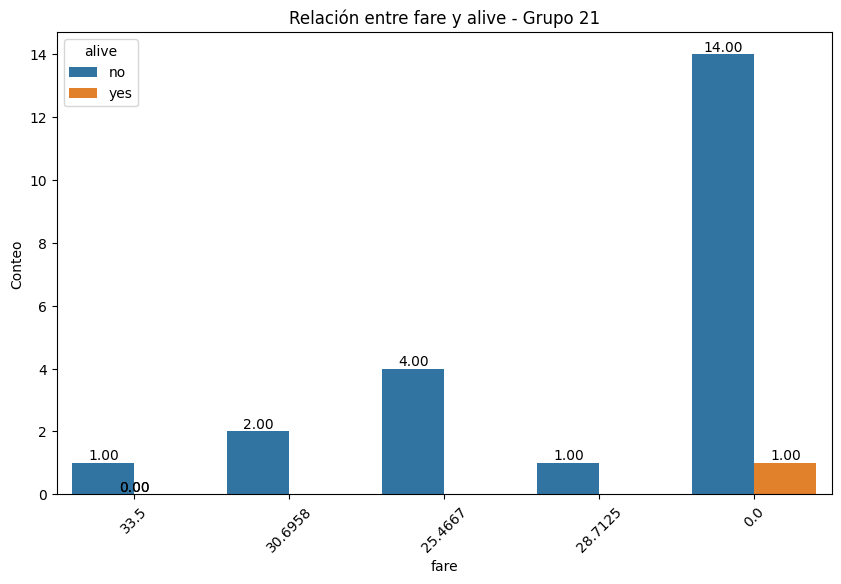

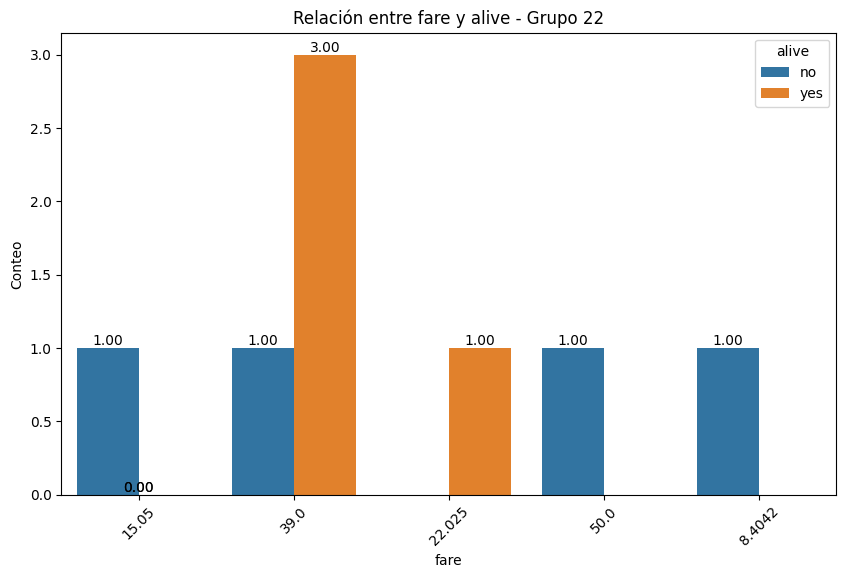

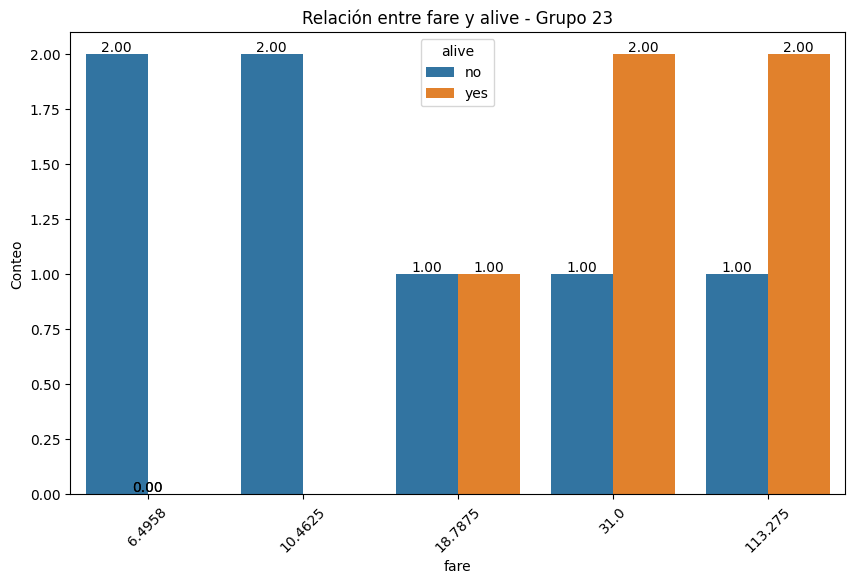

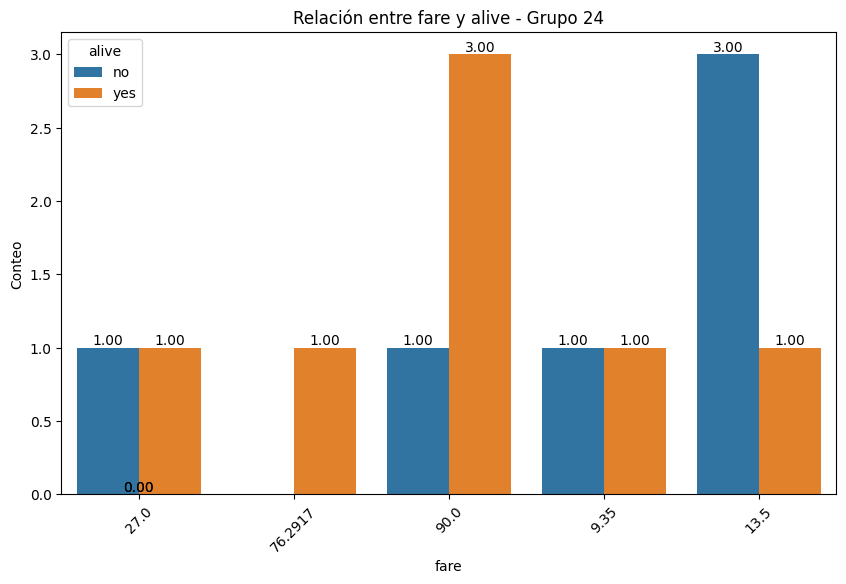

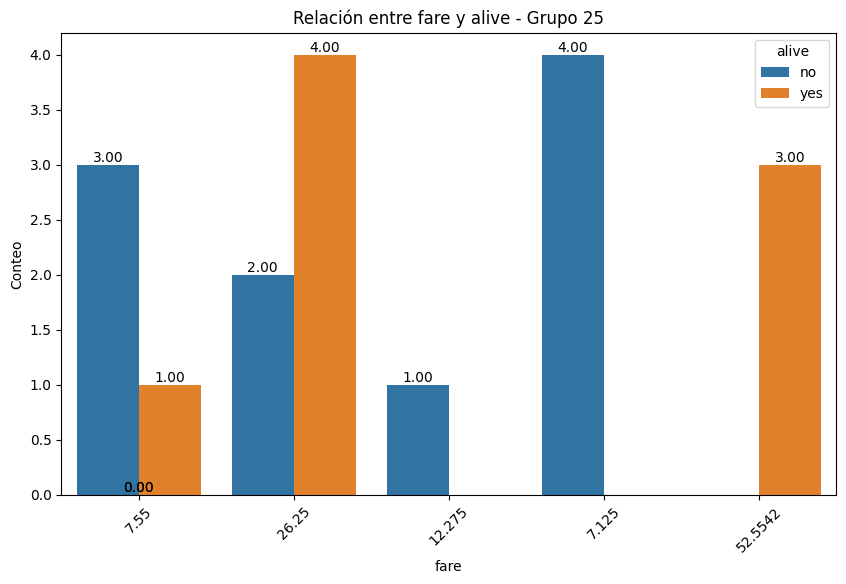

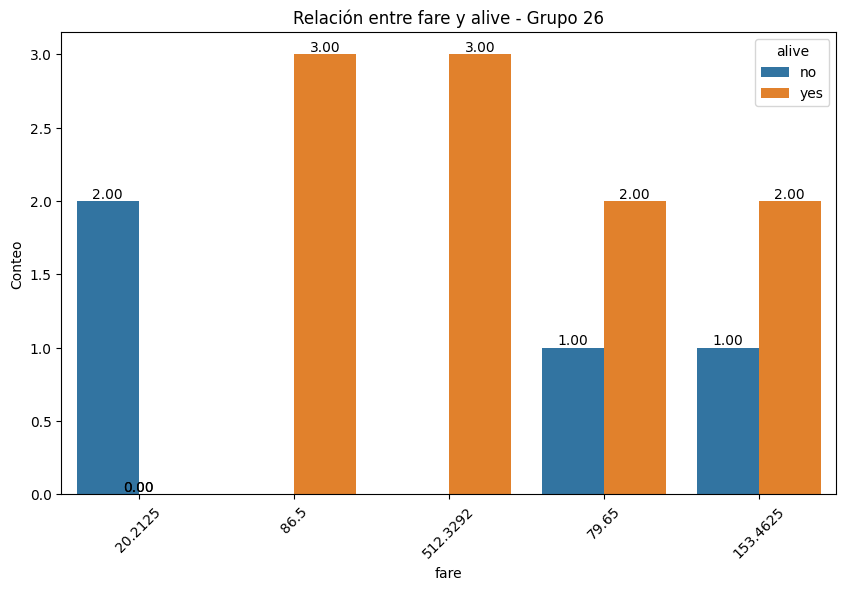

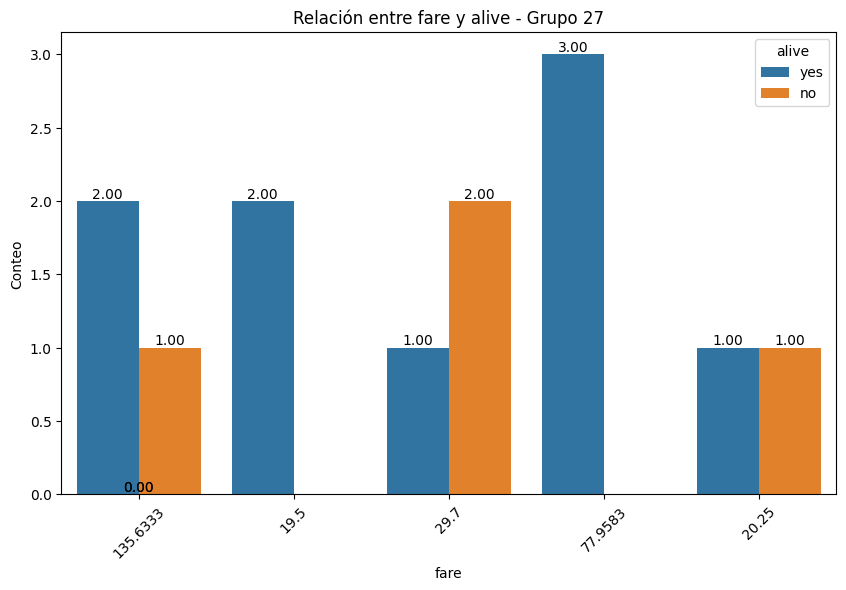

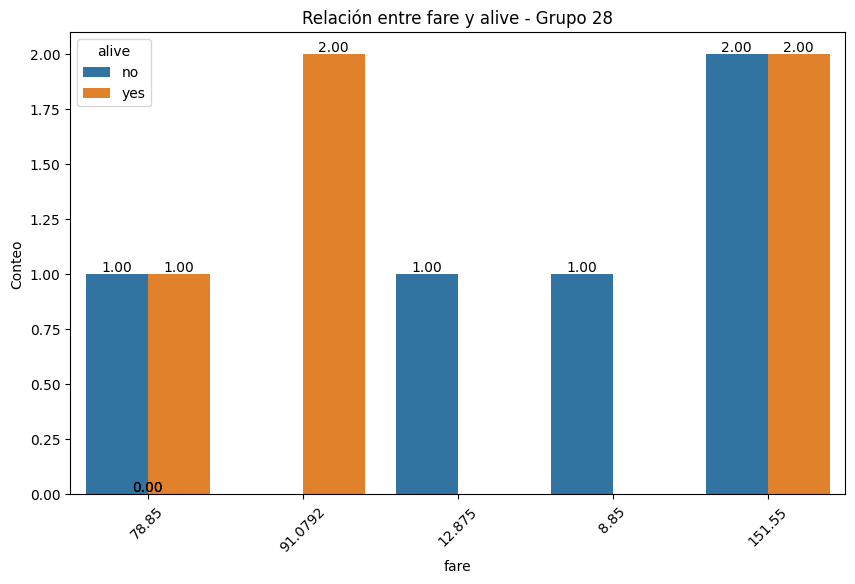

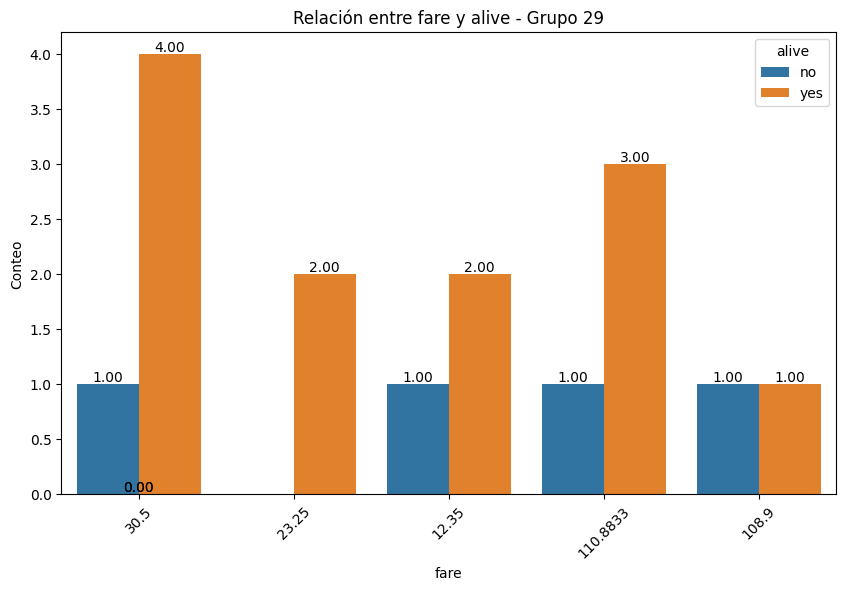

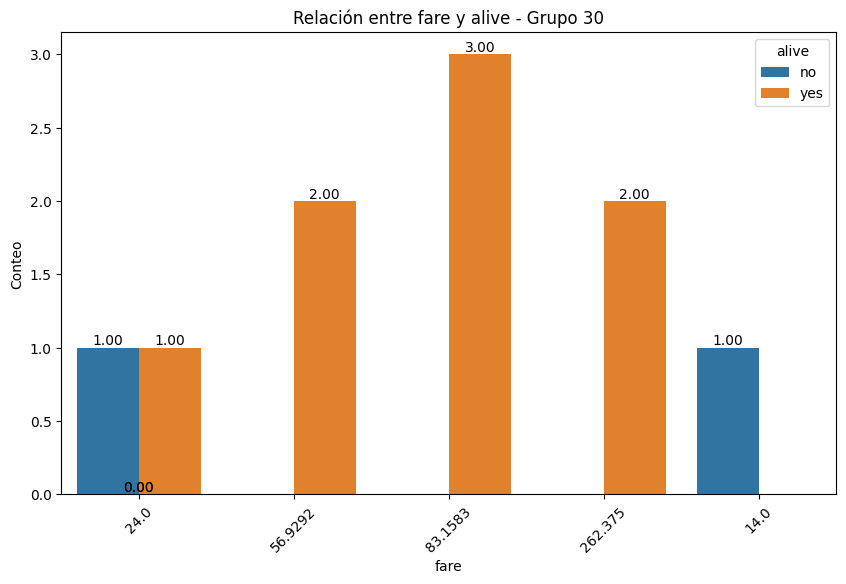

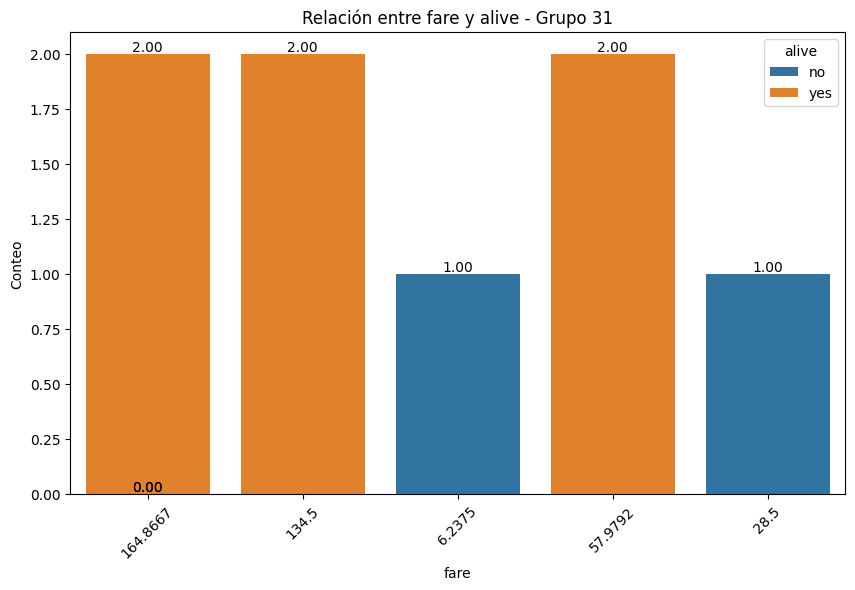

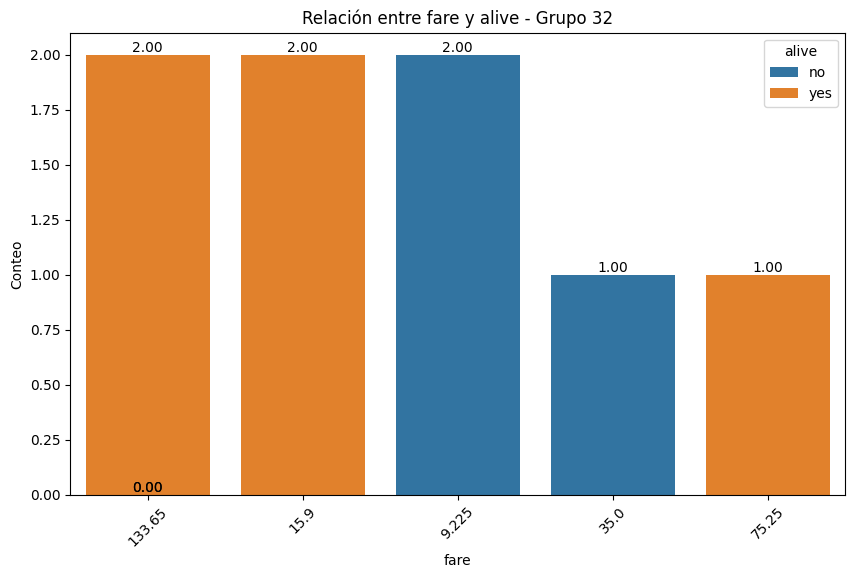

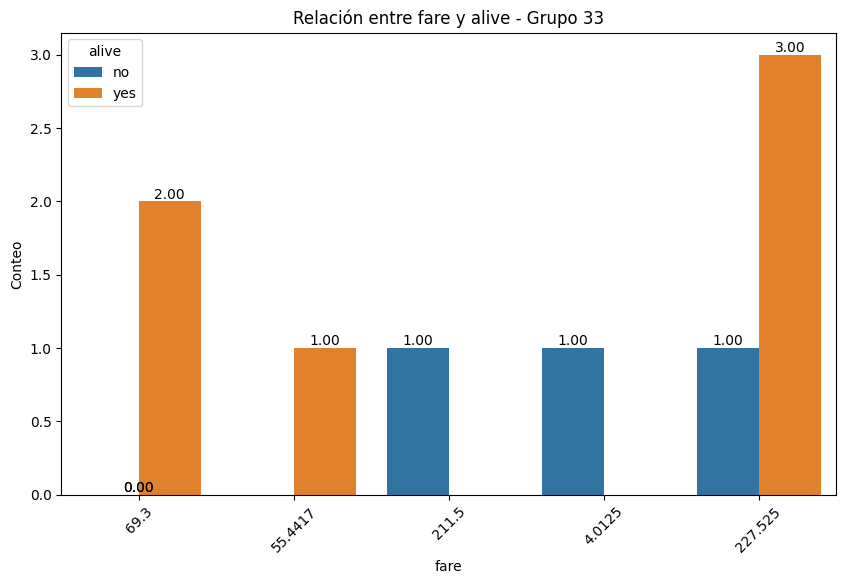

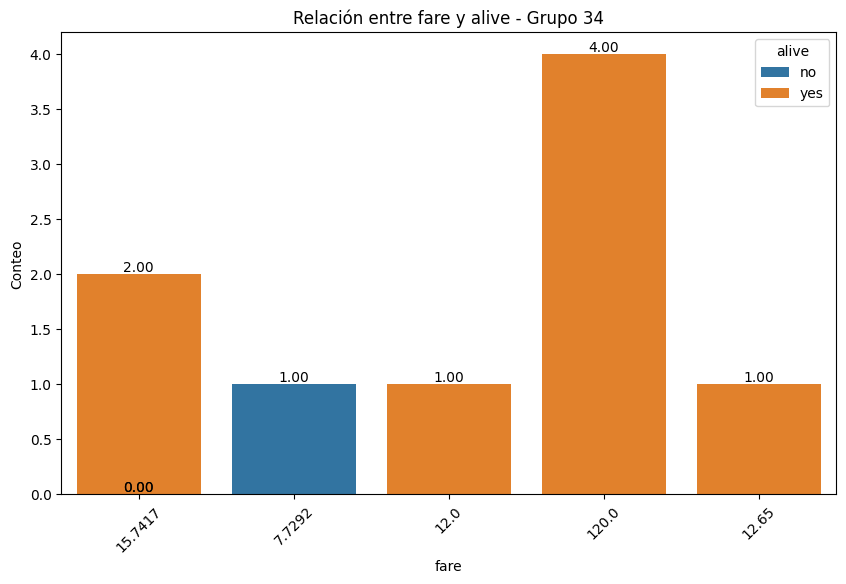

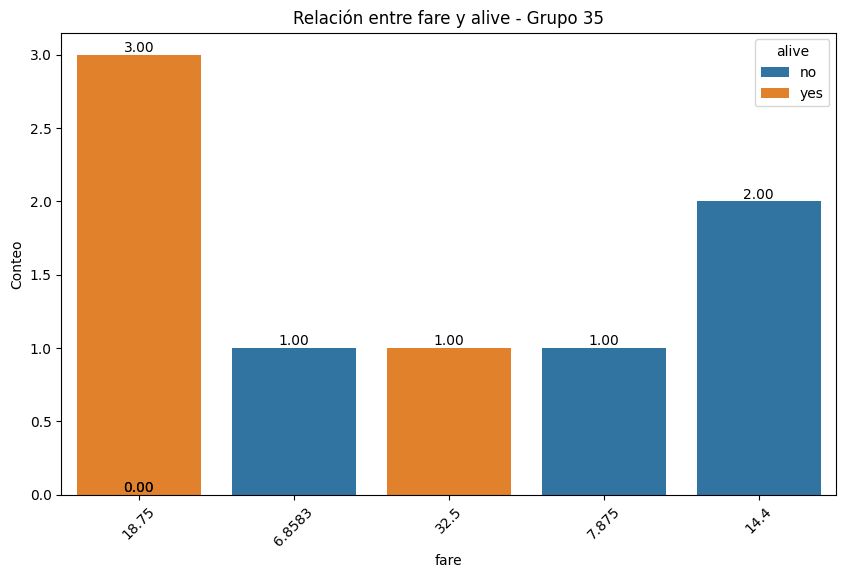

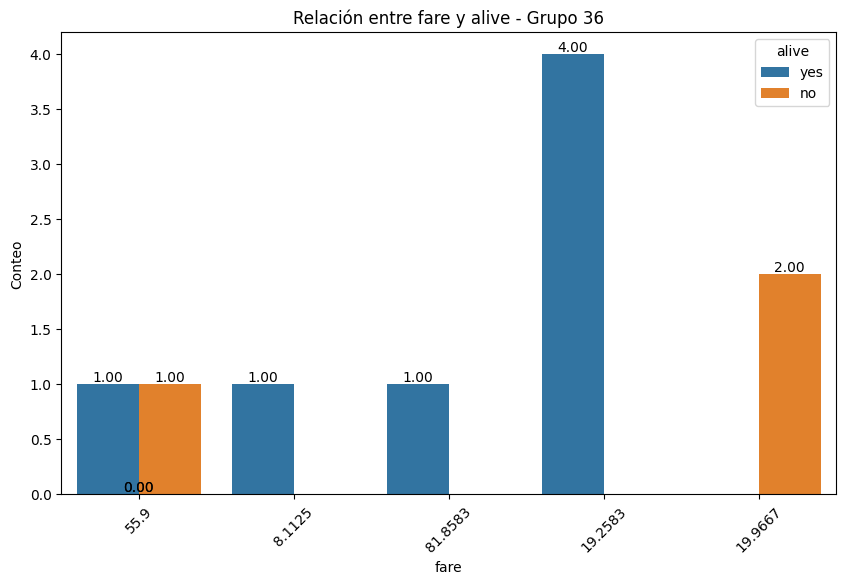

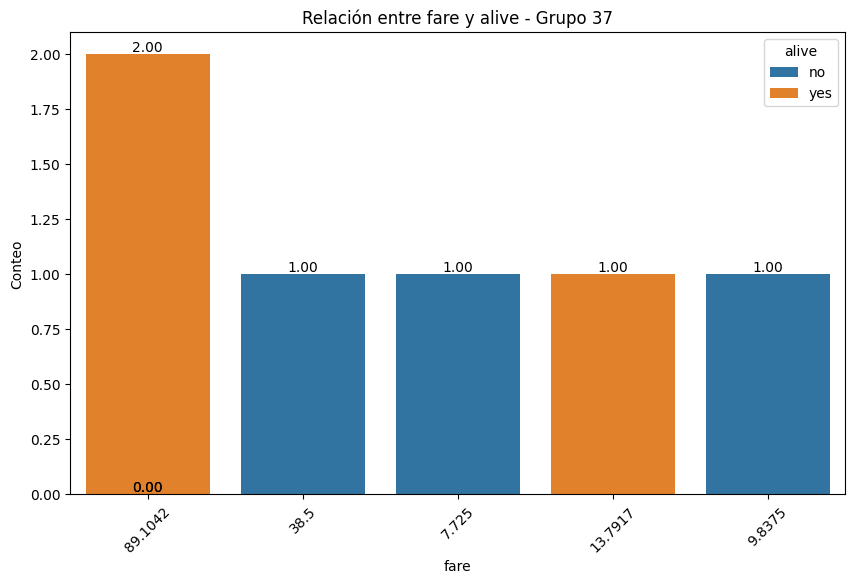

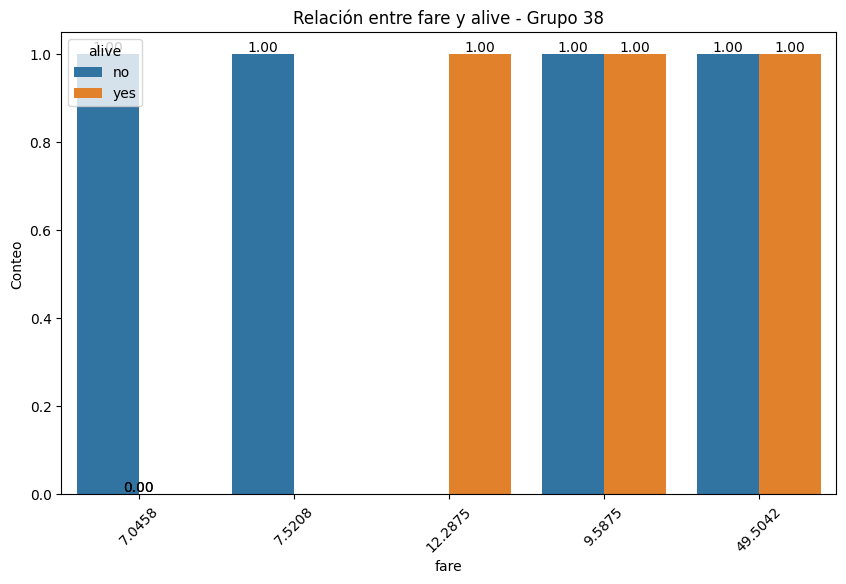

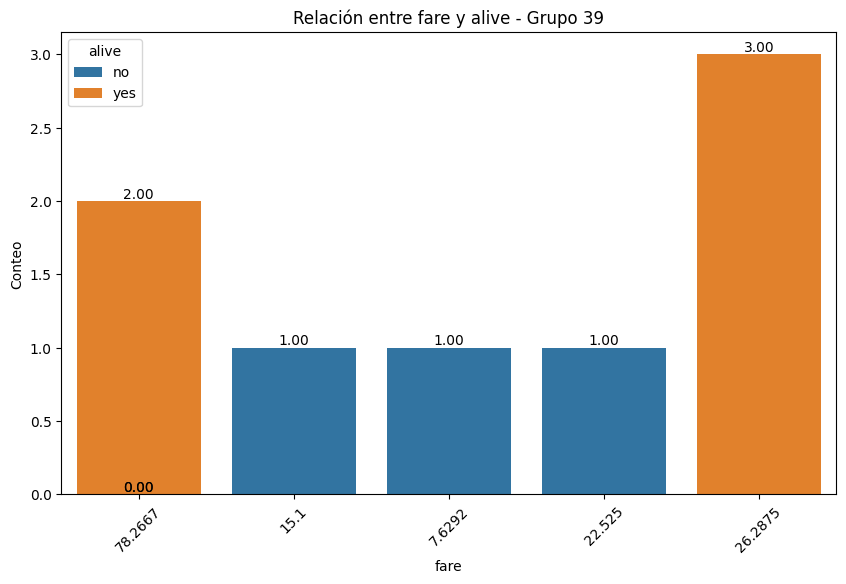

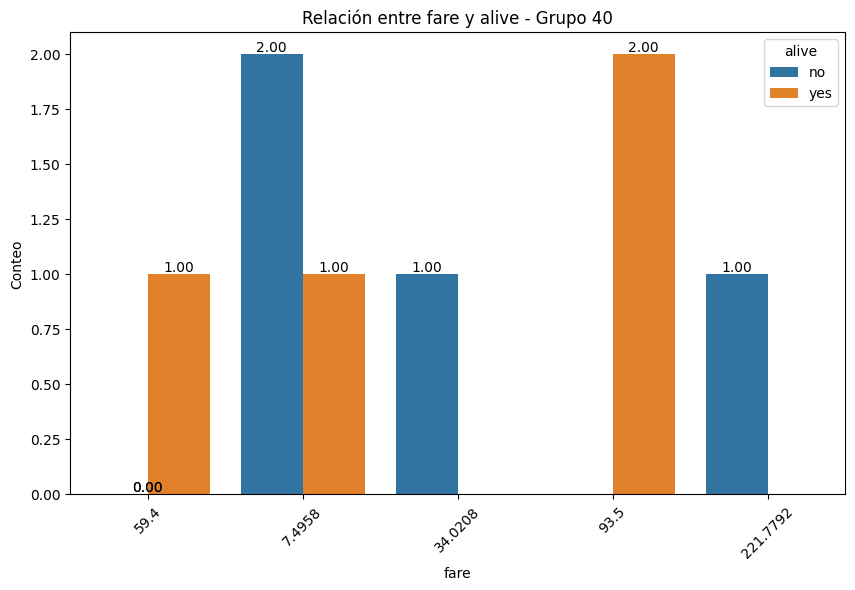

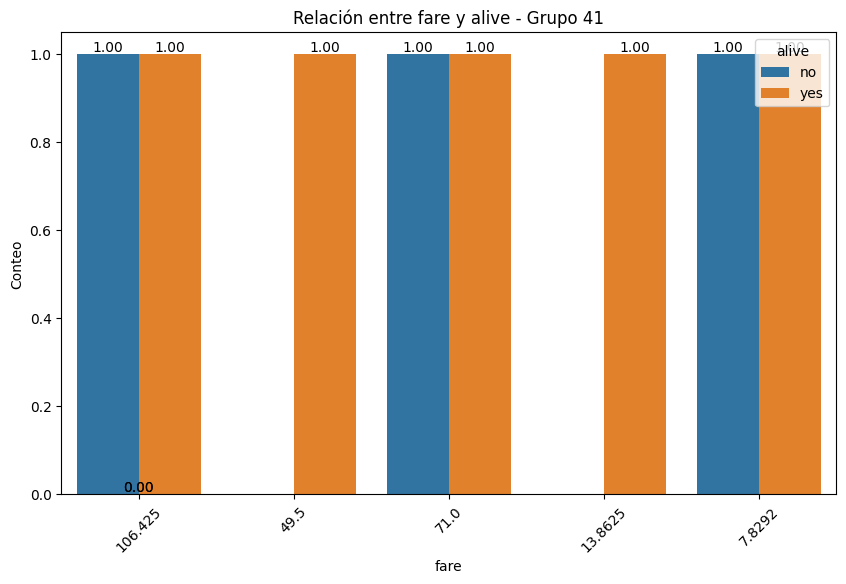

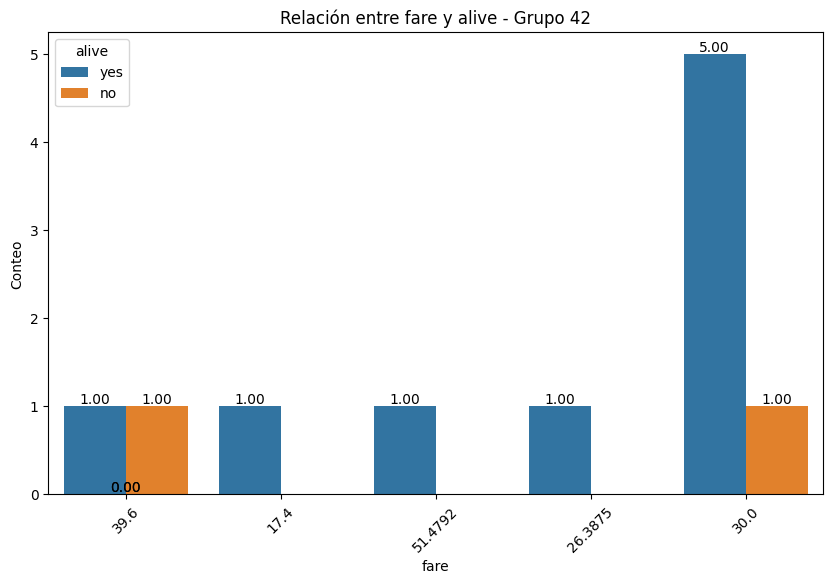

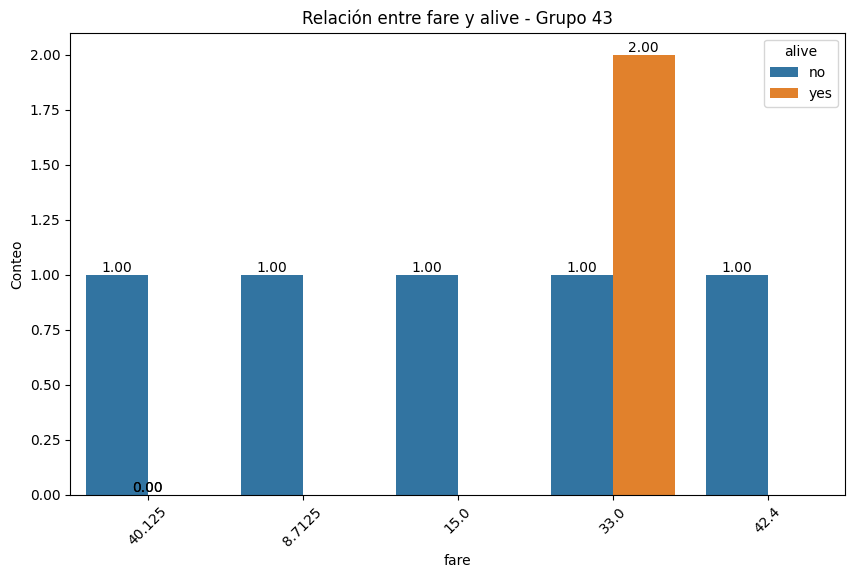

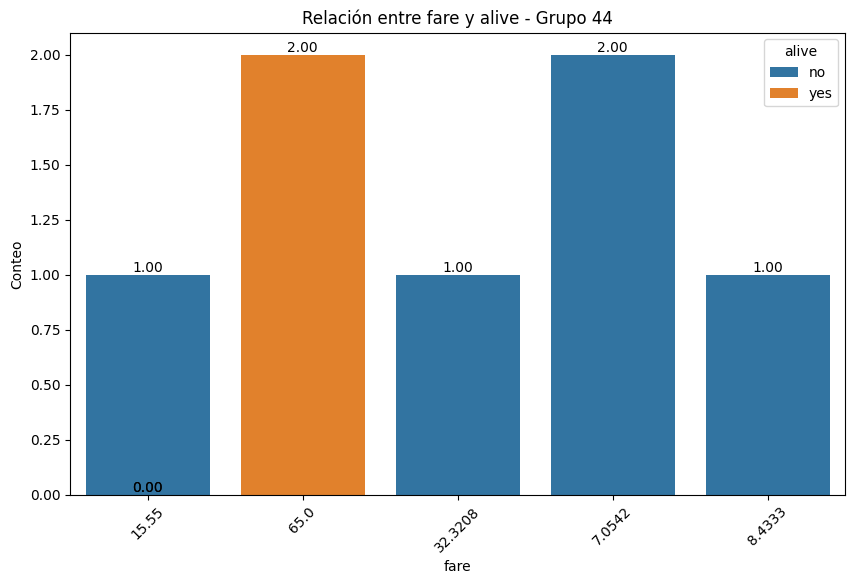

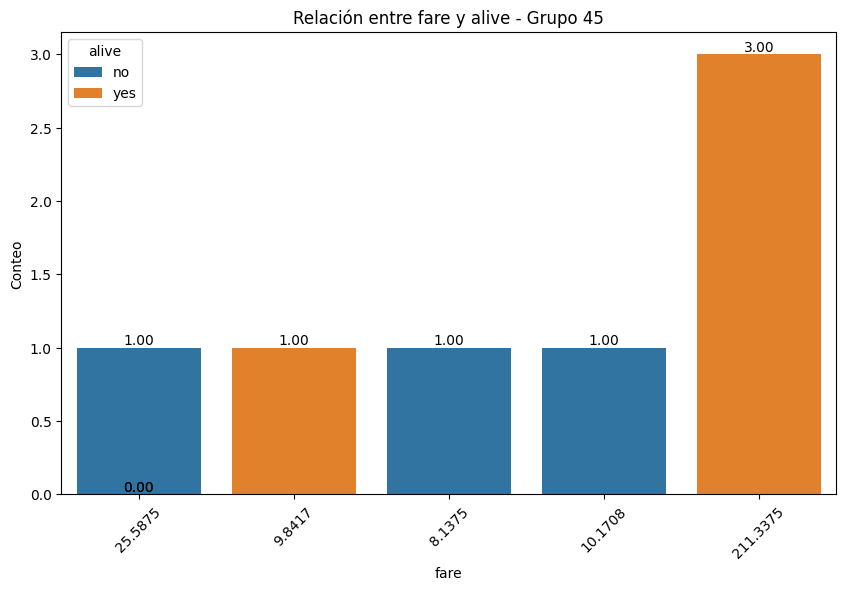

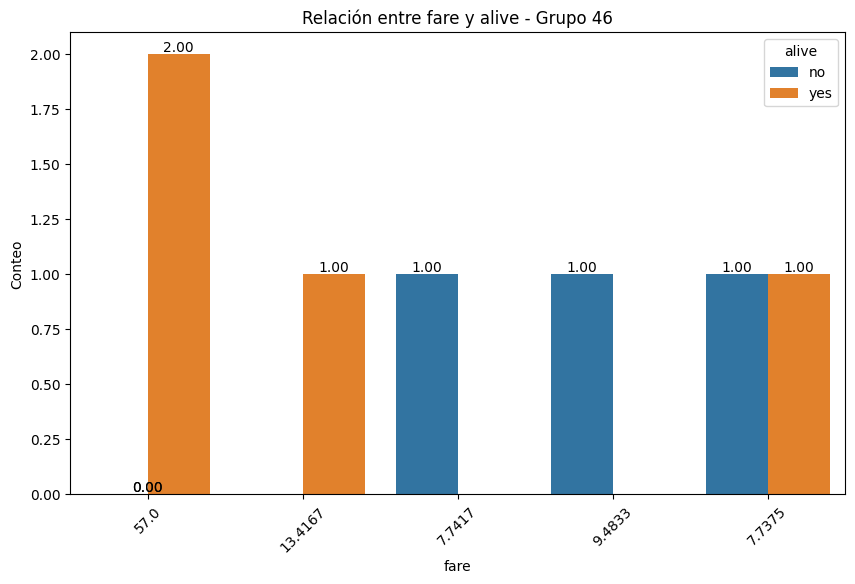

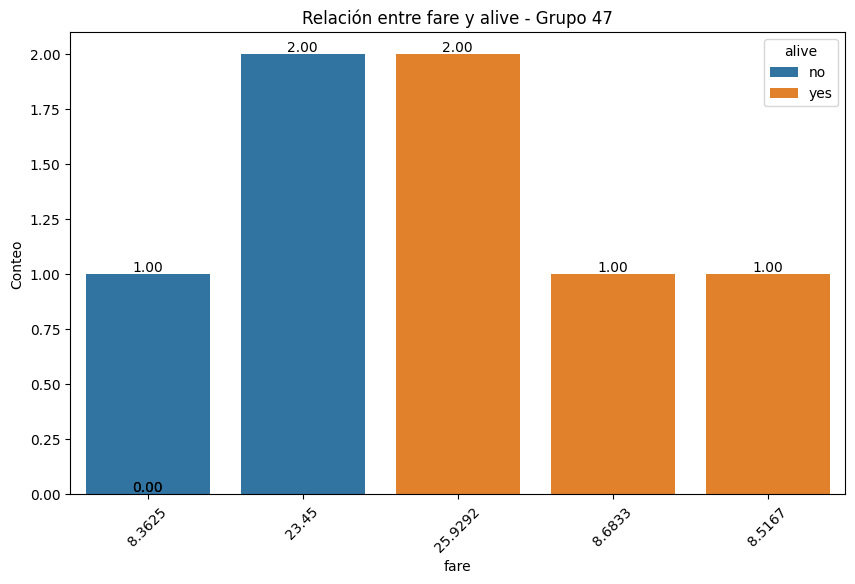

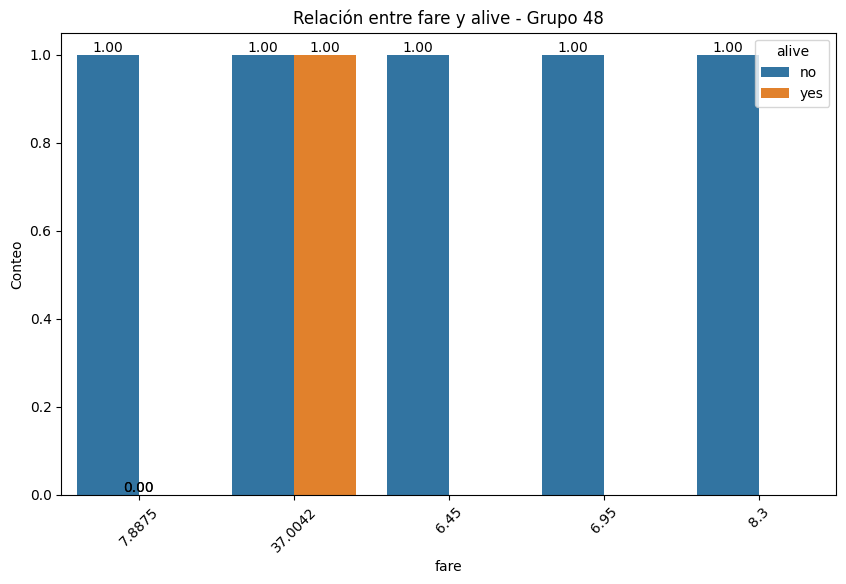

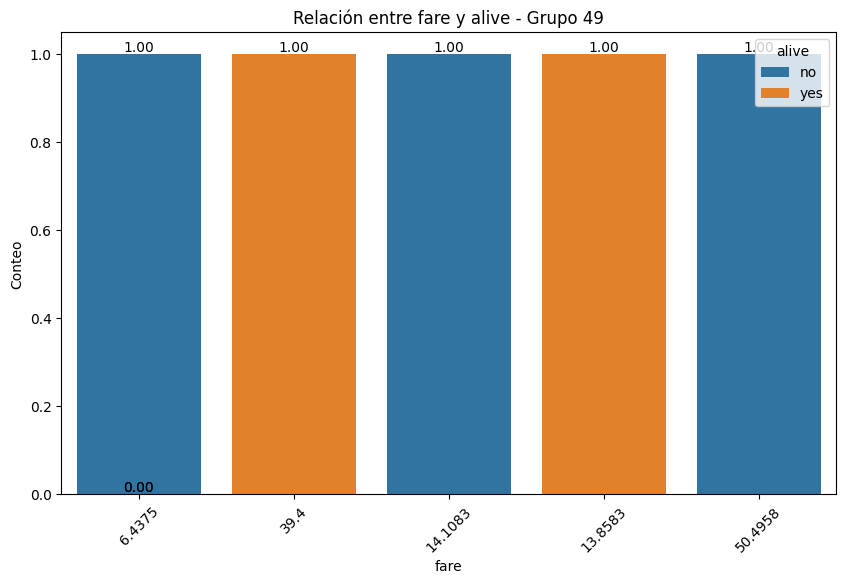

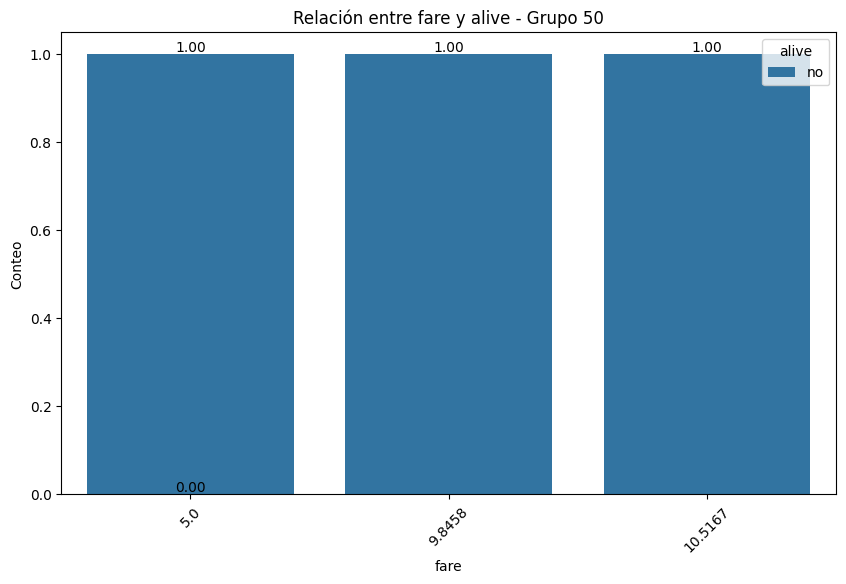

In [146]:
plot_categorical_relationship_fin(df_titanic, "fare","alive", show_values = True)

In [153]:
from scipy.stats import mannwhitneyu

In [152]:
grupo_a = df_titanic.loc[df_titanic.alive == "Yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "No"]["fare"]

In [155]:
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

ValueError: `x` and `y` must be of nonzero size.

In [ ]:
# 5 Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [157]:
df_titanic.loc[df_titanic["fare"] == 0] #Supongo que sería gente que trabajaba en el barco

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_menbers
179,male,36.00,0.0,Third,man,True,Southampton,no,True,0
263,male,40.00,0.0,First,man,True,Southampton,no,True,0
271,male,25.00,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.17,0.0,Second,man,True,Southampton,no,True,0
302,male,19.00,0.0,Third,man,True,Southampton,no,True,0
413,male,33.17,0.0,Second,man,True,Southampton,no,True,0
466,male,33.17,0.0,Second,man,True,Southampton,no,True,0
481,male,33.17,0.0,Second,man,True,Southampton,no,True,0
597,male,49.00,0.0,Third,man,True,Southampton,no,True,0
633,male,33.17,0.0,First,man,True,Southampton,no,True,0


In [158]:
df_titanic.loc[df_titanic["fare"] > 500] #sobrevivieron

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_menbers
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


In [180]:
# 6 Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test,
# muestralo numérica o visualmente.

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [162]:
relacion = df_titanic.groupby(["embark_town", "alive"])["fare"].describe()
relacion

count       mean        std     min      25%       50%  \
embark_town alive                                                           
Cherbourg   no      75.0  35.443335  49.617218  4.0125   7.2292  14.45830   
            yes     93.0  79.720926  99.582717  7.2250  19.2583  56.92920   
Queenstown  no      47.0  13.335904  13.550636  6.7500   7.7500   7.75000   
            yes     30.0  13.182227  15.371167  7.7333   7.7500   7.80835   
Southampton no     427.0  20.743987  27.896824  0.0000   7.8958  10.50000   
            yes    219.0  39.916514  45.383008  0.0000  12.8250  26.00000   

                       75%       max  
embark_town alive                     
Cherbourg   no     32.6750  247.5208  
            yes    89.1042  512.3292  
Queenstown  no     15.5000   90.0000  
            yes    12.3500   90.0000  
Southampton no     26.0000  263.0000  
            yes    52.2771  263.0000

In [177]:
columnas = ["embark_town", "alive"]

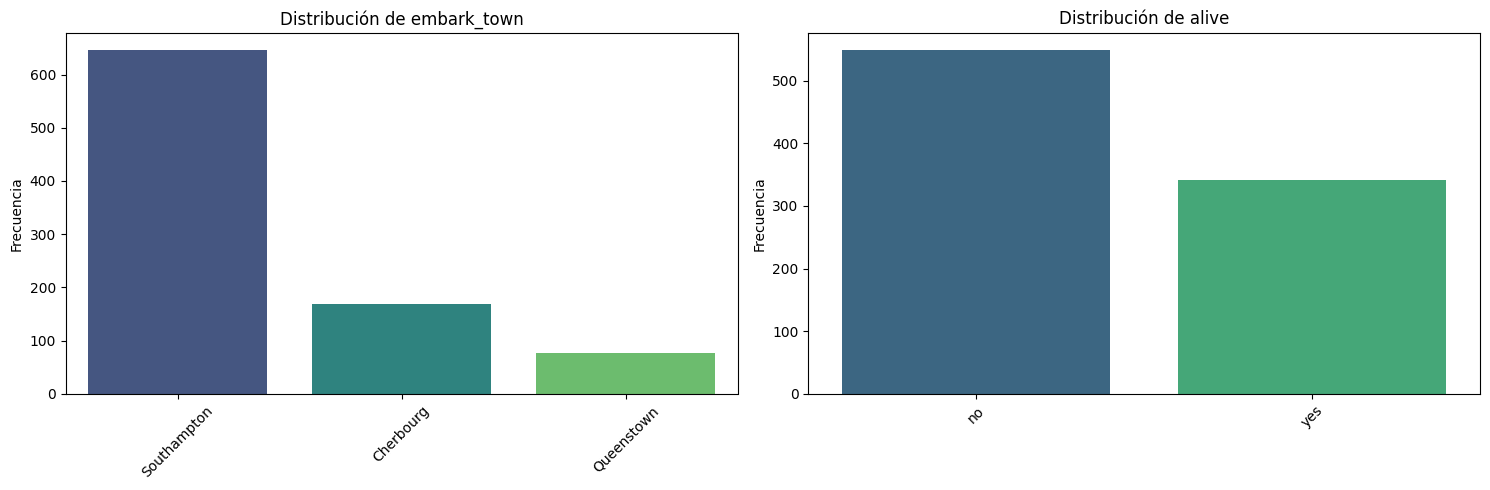

In [178]:
pinta_distribucion_categoricas(df_titanic, columnas)

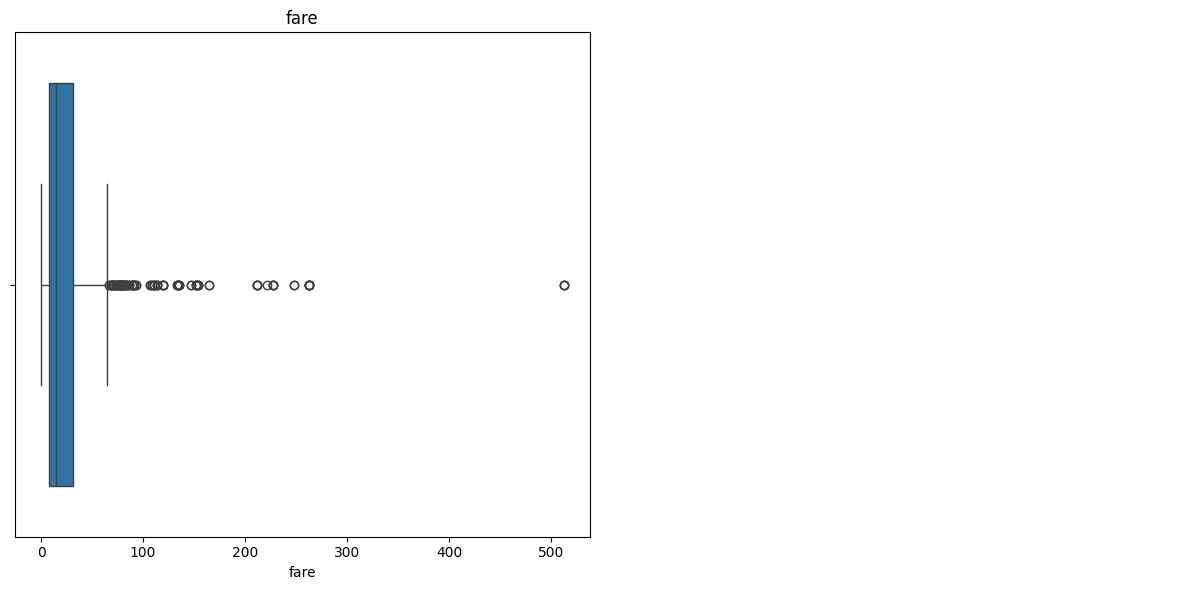

In [185]:
plot_multiple_boxplots(df_titanic, ["fare"])

<Axes: >

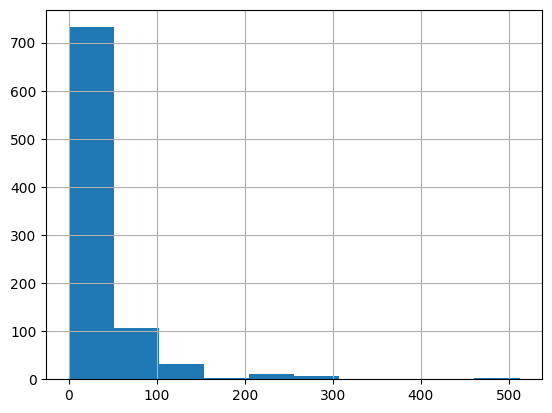

In [184]:
df_titanic["fare"].hist()

In [187]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

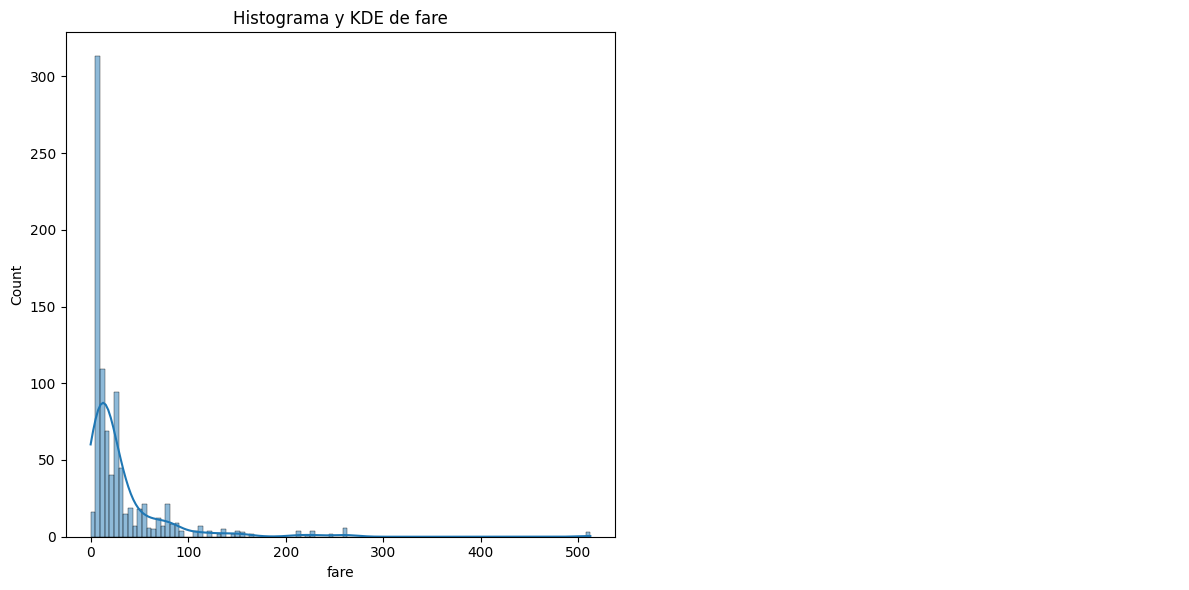

In [188]:
plot_histo_den(df_titanic,["fare"])

In [192]:
# 7 Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos
# variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?
var = ["alive", "class"]

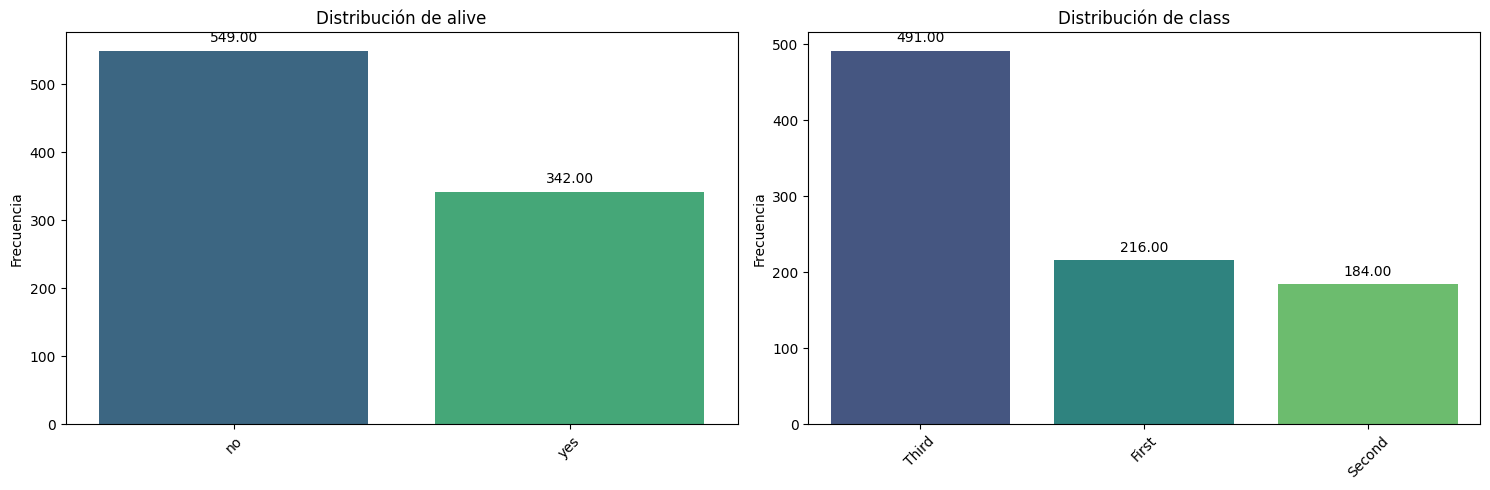

In [195]:
pinta_distribucion_categoricas(df_titanic, var, relativa=False, mostrar_valores=True)

<Axes: >

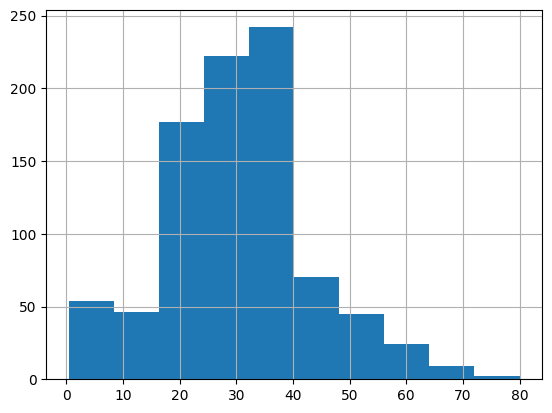

In [194]:
df_titanic["age"].hist()

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [198]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_viajes.sample(10)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
340,MoldaviAir,París,Cádiz,1447,Boeing 737,False,3516.210000,129,49843.91,Mol_PaCa_10737,Jun23
257,TabarAir,Los Angeles,Cincinnati,3073,Boeing 747,False,36033.998000,224,184807.69,Tab_LoCi_10747,Jun23
220,MoldaviAir,Londres,Cádiz,1716,Airbus A320,False,4737.876000,144,64843.91,Mol_LoCa_11320,Jun23
540,Airnar,París,Cincinnati,6370,Airbus A320,True,17127.095440,581,246527.62,Air_PaCi_11320,Jun23
138,FlyQ,Cincinnati,Ginebra,6969,Airbus A320,True,19283.390256,624,279409.02,Fly_CiGi_11320,Jun23
70,FlyQ,Roma,Cincinnati,7480,Airbus A380,False,90792.240000,518,461132.41,Fly_RoCi_11380,Jun23
353,Airnar,Cincinnati,Los Angeles,3073,Boeing 747,False,36033.998000,224,188945.73,Air_CiLo_10747,Jun23
105,MoldaviAir,Cádiz,Londres,1716,Airbus A380,False,20432.068800,134,107529.92,Mol_CaLo_11380,Jun23
239,TabarAir,Londres,Nueva York,5566,Airbus A380,False,70133.826400,391,361918.35,Tab_LoNu_11380,Jun23
502,Airnar,Cádiz,Ginebra,1725,Airbus A320,False,4589.535000,145,65561.74,Air_CaGi_11320,Jun23


In [200]:
df_viajes["aircompany"].value_counts()

aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64

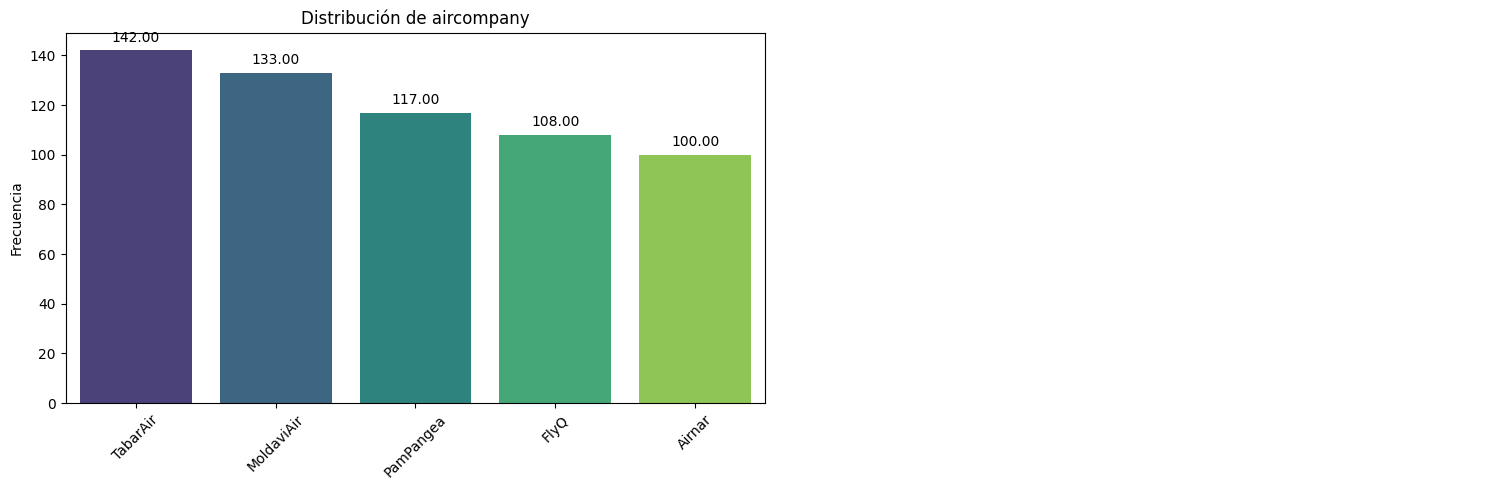

In [201]:
pinta_distribucion_categoricas(df_viajes,["aircompany"], relativa=False, mostrar_valores=True)

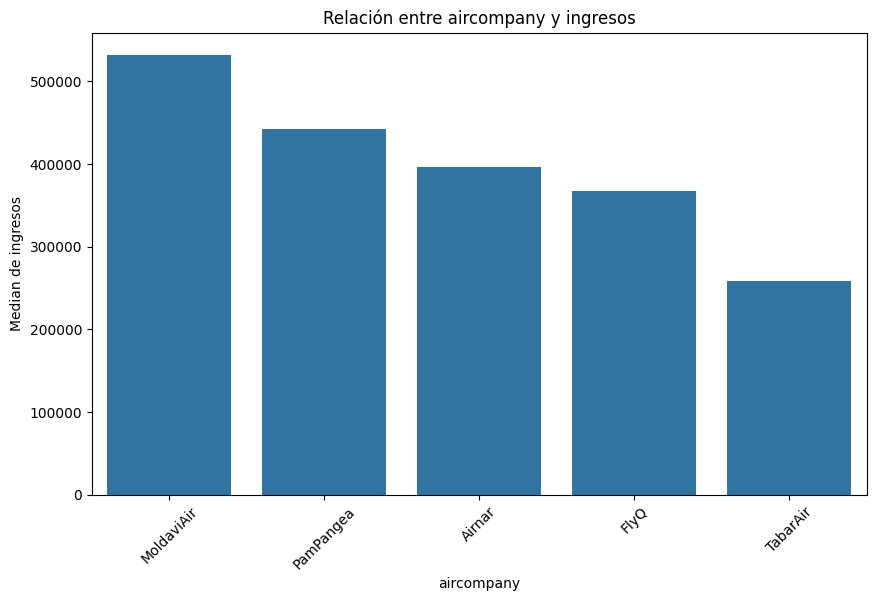

In [204]:
plot_categorical_numerical_relationship(df_viajes,"aircompany","ingresos", measure = "median")

Lo mas llamativo es que la compañia "tabarair", es la que mas vuelos realiza y sin embargo es la que menos ingresos genera. 

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [207]:
col = ["ingresos", "distancia", "consumo_kg"]

(3, 2)


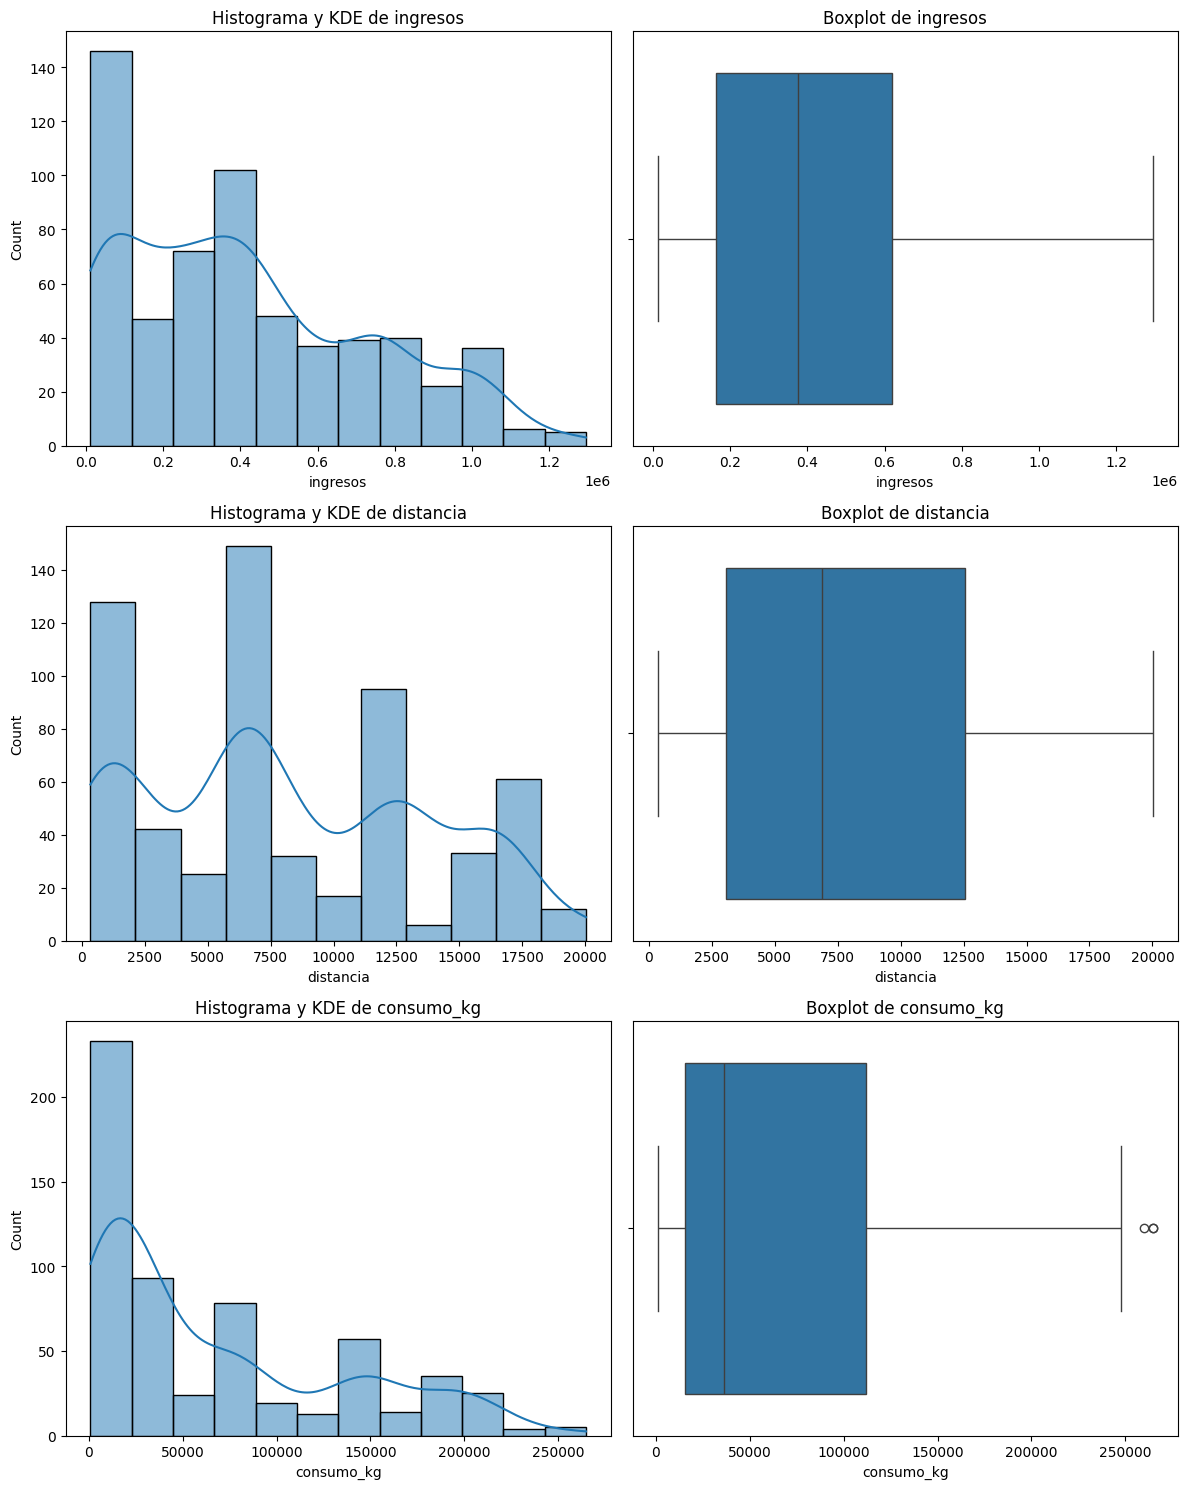

In [208]:
plot_combined_graphs(df_viajes, col)

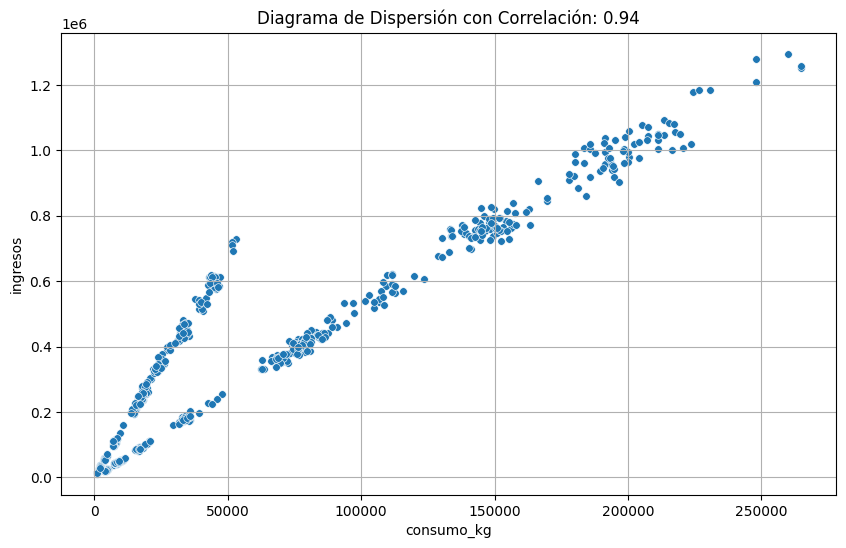

In [209]:
grafico_dispersion_con_correlacion(df_viajes,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

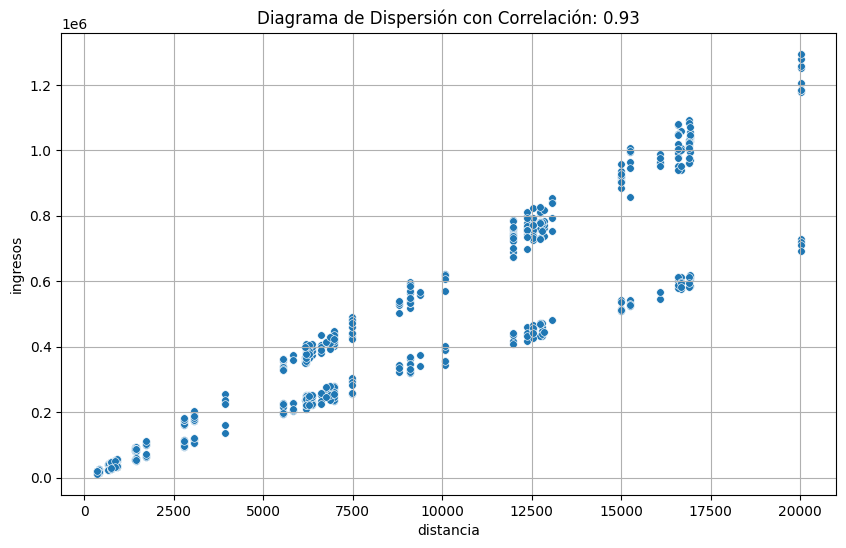

In [210]:
grafico_dispersion_con_correlacion(df_viajes,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

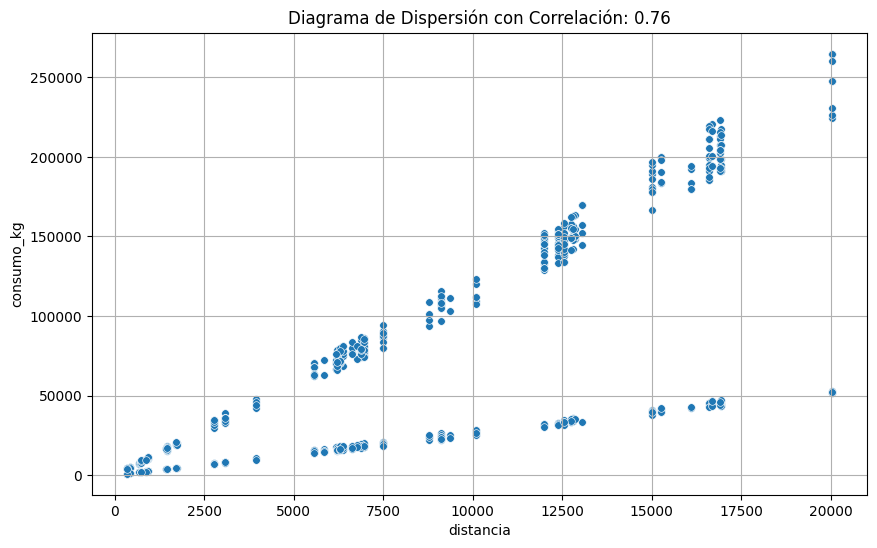

In [211]:
grafico_dispersion_con_correlacion(df_viajes,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

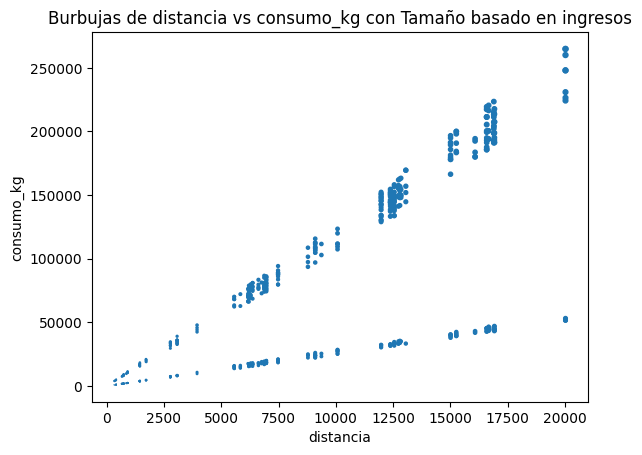

In [213]:
bubble_plot(df_viajes,"distancia","consumo_kg","ingresos", scale = 100000)

In [221]:
corr_matrix = df_viajes.corr(numeric_only= True)
corr_matrix

,distancia,con_escala,consumo_kg,duracion,ingresos
distancia,1.000000,0.669866,0.762341,0.985963,0.928833
con_escala,0.669866,1.000000,0.322295,0.761097,0.515817
consumo_kg,0.762341,0.322295,1.000000,0.668707,0.944875
duracion,0.985963,0.761097,0.668707,1.000000,0.867515
ingresos,0.928833,0.515817,0.944875,0.867515,1.000000


Lo que podemos ver en esta relación es que la compañia "tabarair" realiza vuelos de no muy larga duración, por ello su consumo es menor, al igual que sus ingresos. Además, tendríamos que fijarnos en los vuelos que son mas eficientes para tratar de asemejar nuestros vuelos

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Realiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [214]:
df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB


In [223]:
df_viajes.distancia.describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [237]:
df_viajes["cat_vuelo"] = pd.cut(df_viajes["distancia"], bins=[0, 3000, 10000, 15000, 20000, float("inf")])
df_viajes.sample(5)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
581,FlyQ,Bali,Nueva York,16589,Airbus A380,True,211405.969216,1305,1004810.48,Fly_BaNu_11380,Jun23,"(15000.0, 20000.0]"
495,PamPangea,Melbourne,Londres,16900,Boeing 747,True,204222.574400,1326,977234.28,Pam_MeLo_10747,Jun23,"(15000.0, 20000.0]"
486,TabarAir,Ginebra,Londres,739,Boeing 747,False,7877.740000,69,43799.06,Tab_GiLo_10747,Jun23,"(0.0, 3000.0]"
408,TabarAir,Los Angeles,Ginebra,9103,Airbus A320,True,25425.844184,779,362154.49,Tab_LoGi_11320,Jun23,"(3000.0, 10000.0]"
86,FlyQ,Ginebra,Roma,698,Boeing 747,False,8110.341200,66,40315.51,Fly_GiRo_10747,Jun23,"(0.0, 3000.0]"


(3, 2)


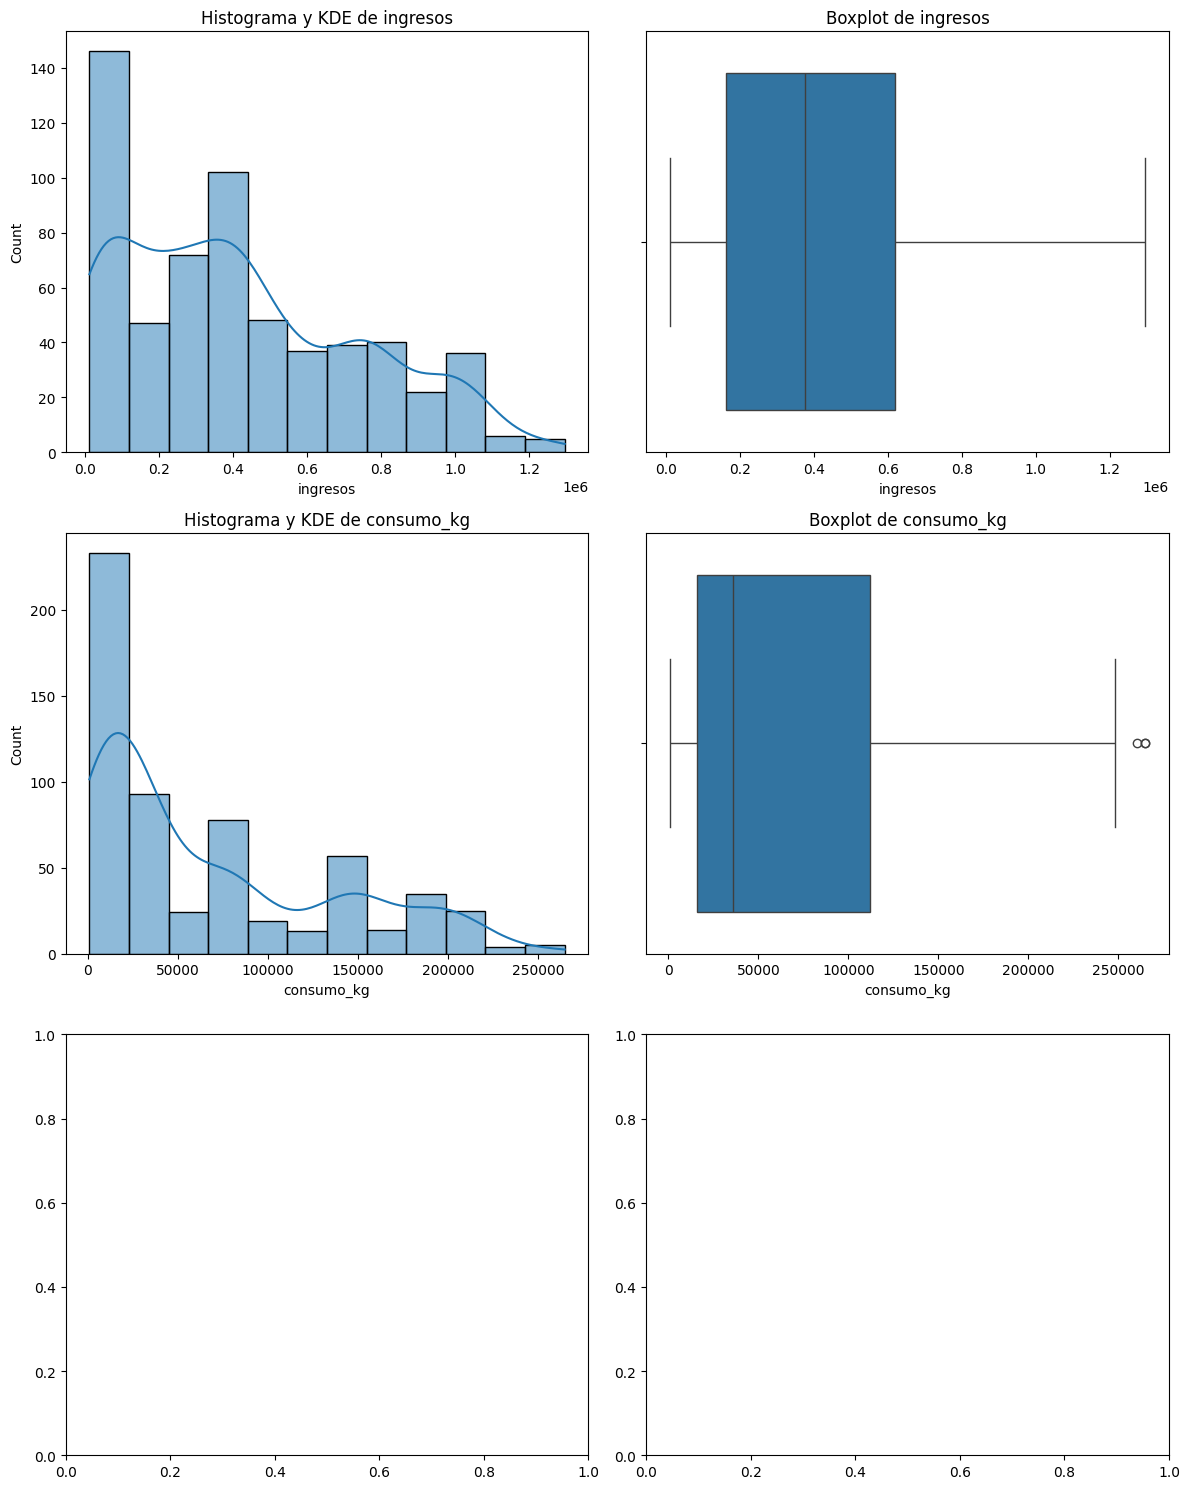

In [238]:
plot_combined_graphs(df_viajes,["ingresos","consumo_kg","cat_vuelo"])

TypeError: '<' not supported between instances of 'pandas._libs.interval.Interval' and 'float'

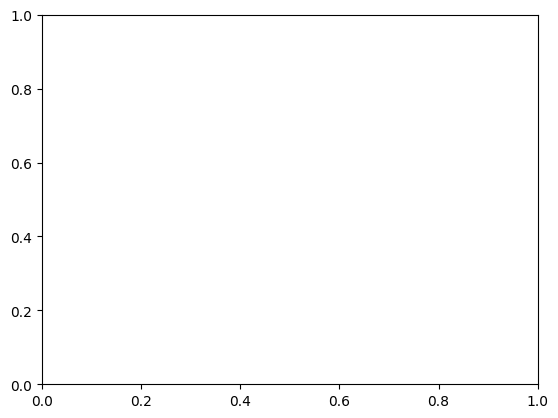

In [239]:
df_viajes["cat_vuelo"].hist()

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.